#### Andrew Taylor
#### atayl136
#### EN705.601 Applied Machine Learning
## Homework 12

Number of Rows: 284807
Number of Columns: 31
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -

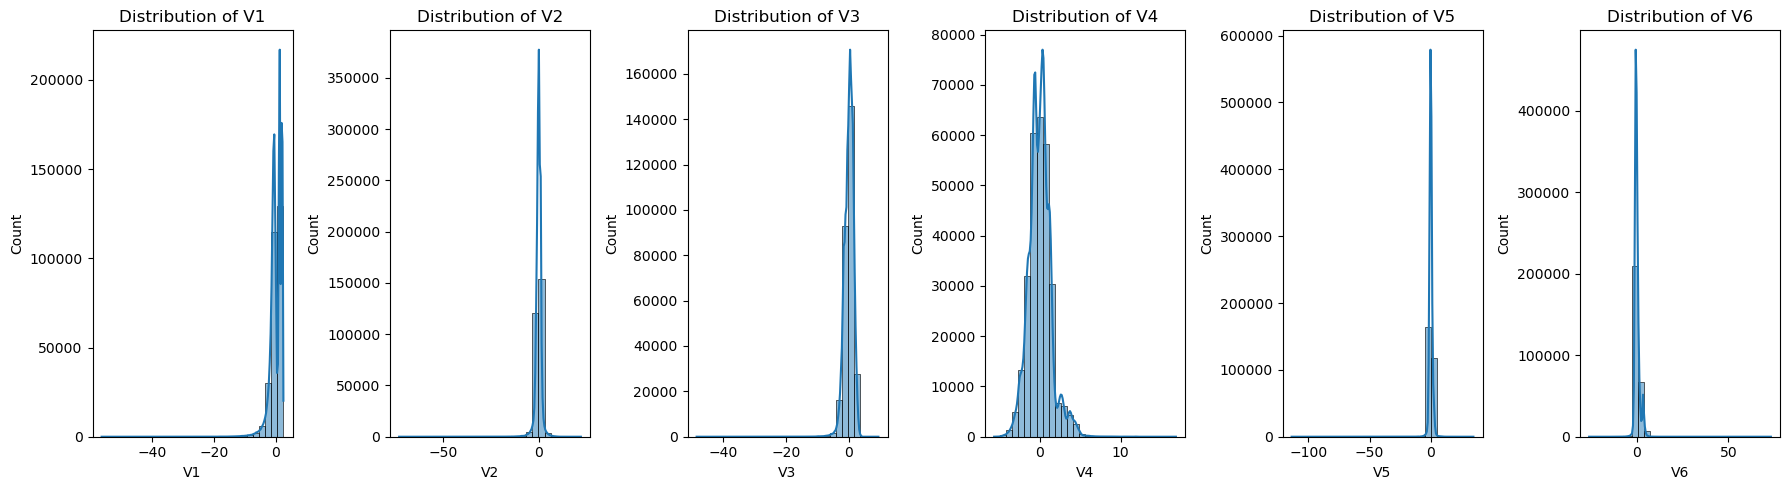

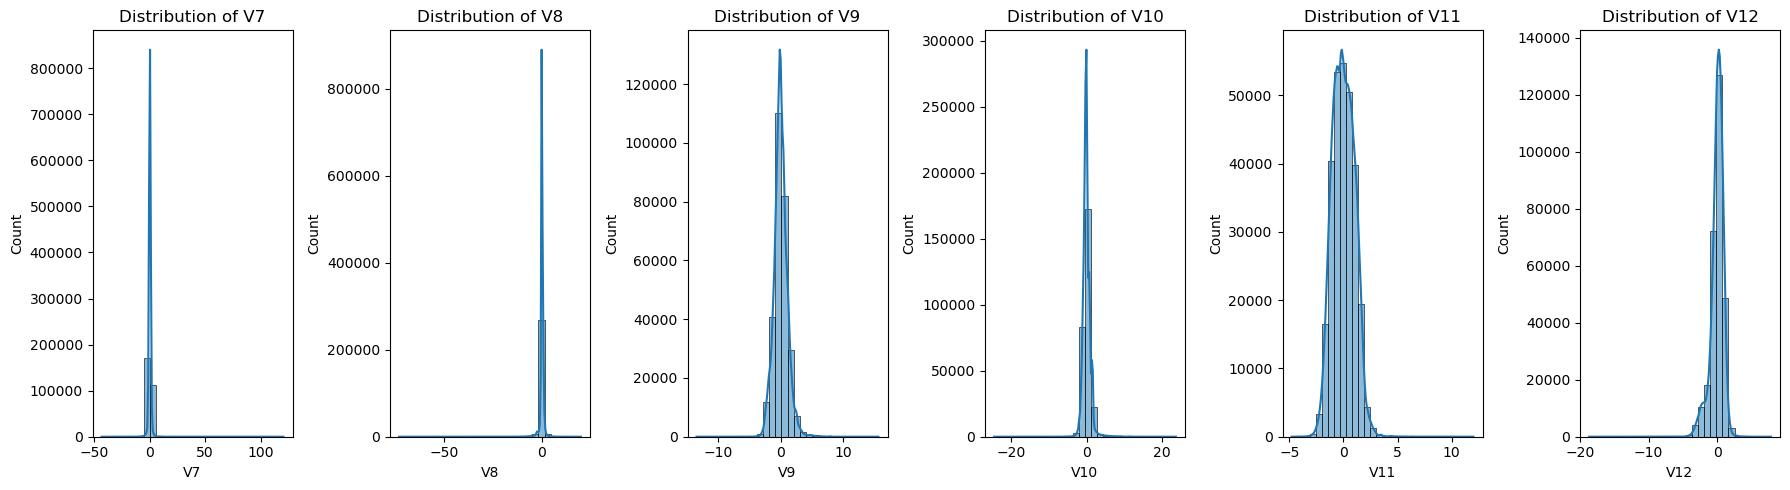

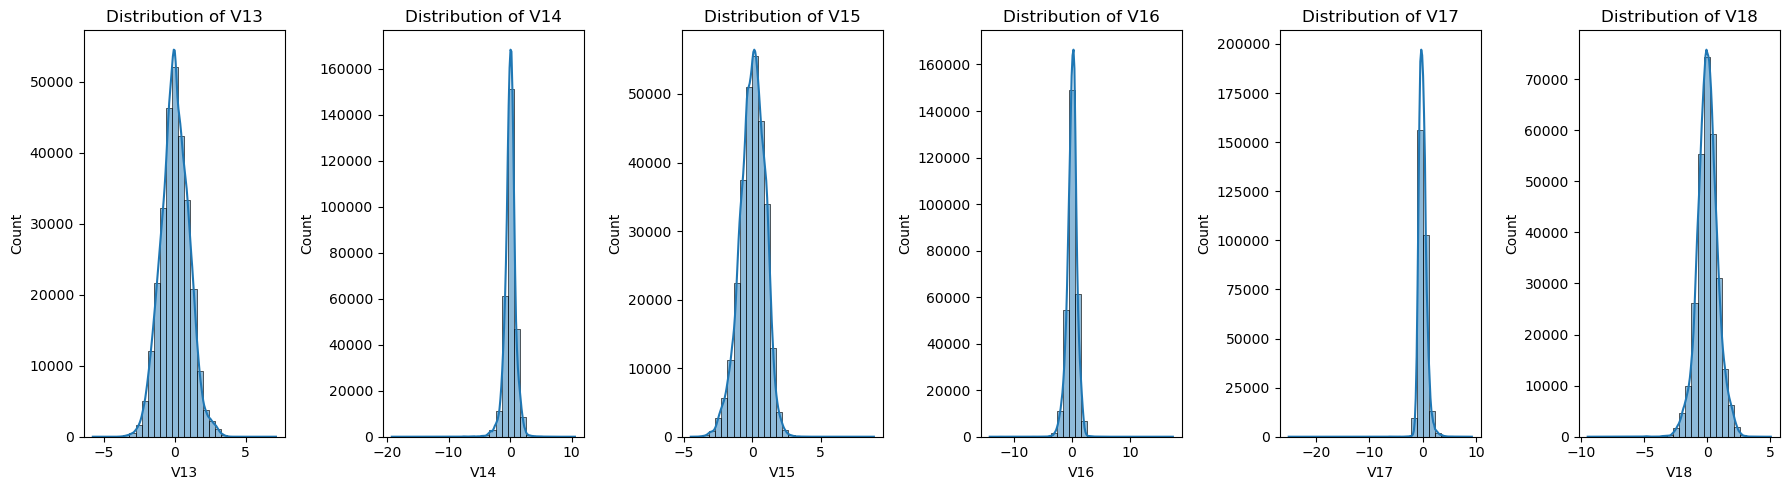

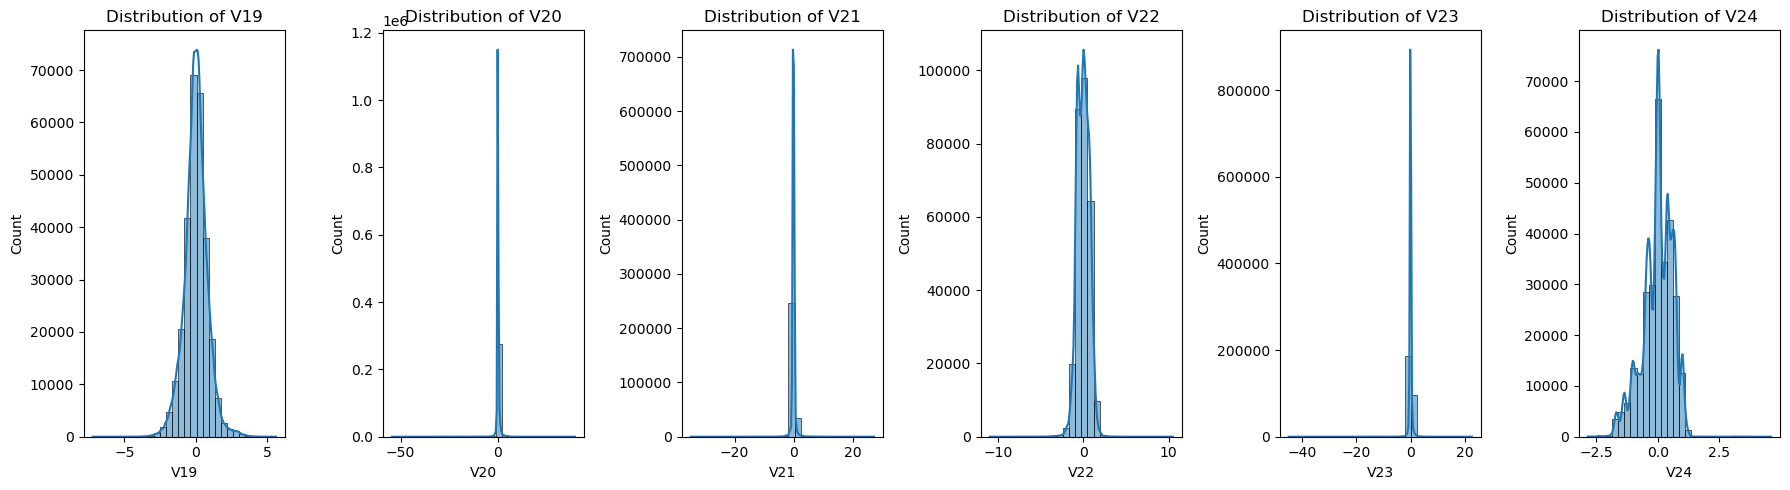

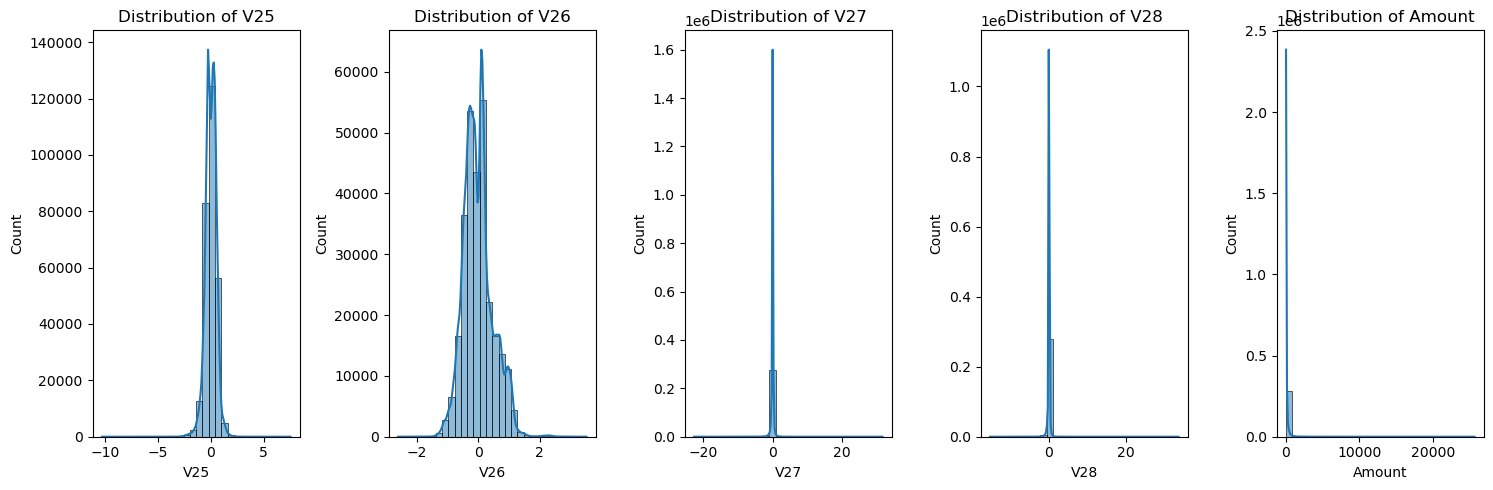

In [4]:
# Question 1 - Explore the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'creditcard.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display basic information about the dataset (number of rows, columns, and first few rows)
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check the distribution of the 'Class' variable
class_distribution = data['Class'].value_counts(normalize=True)
print("Class Distribution:\n", class_distribution)

# Number of features to display per figure
features_per_figure = 6

# Total number of features (excluding the 'Time' and 'Class' columns)
total_features = len(data.columns) - 2  # Excluding 'Time' and 'Class'

# Number of figures needed
num_figures = (total_features + features_per_figure - 1) // features_per_figure

# Create subplots for each feature
for i in range(num_figures):
    plt.figure(figsize=(18, 5))
    for j in range(features_per_figure):
        # Calculate the index of the current feature
        feature_index = i * features_per_figure + j
        if feature_index >= total_features:
            break
        feature_name = data.columns[feature_index + 1]  # +1 to skip the 'Time' column
        plt.subplot(1, features_per_figure, j + 1)
        sns.histplot(data[feature_name], bins=30, kde=True)
        plt.title(f'Distribution of {feature_name}')
    plt.tight_layout()
    plt.show()



#### Question 2: Class Balance and Evaluation Metric

The class distribution in the dataset is as follows:  

Non-fraudulent transactions (Class 0): 99.83%  
Fraudulent transactions (Class 1): 0.17%  

This confirms a severe class imbalance, where fraudulent transactions are a very small minority. In such cases, accuracy is not a reliable metric because a model that always predicts 'non-fraudulent' would be accurate in the vast majority of cases but useless for fraud detection.  

Given this imbalance, I will be using the Precision-Recall AUC or F1 Score as our evaluation metric. These metrics are more informative in imbalanced contexts like this, as they focus more on the performance of the model in identifying the minority class (fraudulent transactions) correctly.  

Precision-Recall AUC is particularly useful if we are more interested in the reliability of the positive (fraudulent) predictions. It evaluates both the ability of the model to retrieve the relevant data (recall) and its ability to provide a high ratio of true positives among the positive predictions (precision).

F1 Score offers a balance between precision and recall, providing a single metric that accounts for both false positives and false negatives. It is especially useful if we seek a balance between identifying as many frauds as possible (recall) and maintaining a reasonable level of precision.

#### Question 3: Preprocessing

To determine whether normalization or standardization is necessary, we need to consider the nature of the data and the requirements of the machine learning algorithms we plan to use.

1. **Nature of the Data**: 
    - The `V1` to `V28` features are results from a PCA transformation, which generally means they are already scaled and orthogonal to each other. PCA usually requires standardization of data before its application, so these features are likely standardized.
    - The `Time` and `Amount` features, however, are not part of this PCA transformation and might need scaling.

2. **Requirements of Machine Learning Algorithms**:
    - Algorithms like Neural Networks, Support Vector Machines, and K-Nearest Neighbors are sensitive to the scale of the input data. Standardization or normalization can help improve their performance.
    - Tree-based algorithms like Random Forests or Gradient Boosted Trees, however, are not sensitive to the scale of the data.

Given these considerations:

- **Standardization (Z-score normalization)**: Transforms the data to have zero mean and unit variance. It's suitable if our model assumes that the data is normally distributed or if we are using algorithms sensitive to the scale.
- **Normalization (Min-Max scaling)**: Rescales the data to a fixed range, typically [0, 1]. It's useful if we need to bound our values within a specific range.

For the `creditcard.csv` dataset:

- It seems reasonable to apply standardization to the `Time` and `Amount` features, as other features are already scaled due to PCA.
- If we plan to use algorithms sensitive to the scale of the data (like SVM, KNN, or Neural Networks), this step is crucial.

Let's perform the standardization on the `Time` and `Amount` features. Additionally, we should also handle the class imbalance, possibly using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights in the model. 

First, we'll standardize the `Time` and `Amount` features. Then, we'll briefly touch on how to address the class imbalance. Let's proceed with the standardization.



In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Creating a copy of the dataset for preprocessing
preprocessed_data = data.copy()

# Standardizing the 'Time' and 'Amount' features
scaler = StandardScaler()
preprocessed_data['NormalizedTime'] = scaler.fit_transform(preprocessed_data[['Time']])
preprocessed_data['NormalizedAmount'] = scaler.fit_transform(preprocessed_data[['Amount']])

# Dropping the original 'Time' and 'Amount' columns
preprocessed_data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Displaying the first few rows of the preprocessed dataset
print(preprocessed_data.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  NormalizedTime  NormalizedAm

The `Time` and `Amount` features have been standardized and renamed to `NormalizedTime` and `NormalizedAmount`, respectively. The original `Time` and `Amount` columns have been removed from the dataset.

With the data now standardized, the next step is to address the class imbalance. There are several methods to do this, but a common approach in practice is to use oversampling techniques like SMOTE, which synthesizes new examples in the minority class. Alternatively, adjusting class weights in the model can also help to mitigate the imbalance. We'll do that during evaluation.


#### Question 4: Comparing the performance pre and post-regularization  

For this task, we will follow these steps:  

Split the dataset into a 50-50 split for training and testing.  
Train four models (SVC, Decision Tree, MLP Classifier, RandomForest) without any tree pruning or regularization, with class weights balanced.  
Evaluate and report the classification performance of these models.  
Train the same models (except RandomForest) with tree pruning and regularization using GridSearchCV to optimize the regularization parameters.  
Evaluate and report the classification performance of these optimized models.  
I'll provide the code to accomplish these steps. Since the process involves training multiple models and optimizing parameters with GridSearchCV, which can be computationally intensive, it might take a significant amount of time to execute, depending on your computing resources.  

Let's start with the first part: splitting the dataset, training the initial set of models, and evaluating their performance. Note that for RandomForest, we don't usually apply explicit regularization or pruning like in decision trees, but we can control overfitting through parameters like max_depth, min_samples_leaf, etc., which we will keep at default to provide a reference.  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Load your preprocessed dataset
data = preprocessed_data

# Split the dataset into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the data into training and test sets (50% training, 50% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize models with balanced class weights
svc = SVC(class_weight='balanced', random_state=42)
dtree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
mlp = MLPClassifier(max_iter=1000, random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Training the models
svc.fit(X_train, y_train)
dtree.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Evaluating the models
models = {'SVC': svc, 'Decision Tree': dtree, 'MLPClassifier': mlp, 'RandomForest': rf}

# Evaluating the models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    


Classification Report for SVC:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.33      0.68      0.44       246

    accuracy                           1.00    142404
   macro avg       0.66      0.84      0.72    142404
weighted avg       1.00      1.00      1.00    142404

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.73      0.63      0.67       246

    accuracy                           1.00    142404
   macro avg       0.86      0.81      0.84    142404
weighted avg       1.00      1.00      1.00    142404

Classification Report for MLPClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.82      0.81      0.81       246

    accuracy                           1.00    142404
   macro avg   

In [9]:
# Question 4, Part II: Performance with Regularization and Pruning

from sklearn.model_selection import GridSearchCV

# Define parameter grid for each model
svc_params = {'C': [0.1, 1, 10, 100]}
dtree_params = {'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4]}
mlp_params = {'alpha': [0.0001, 0.001, 0.01, 0.1]}

# GridSearchCV for each model
svc_gs = GridSearchCV(SVC(class_weight='balanced', random_state=42), svc_params, cv=3)
dtree_gs = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42), dtree_params, cv=3)
mlp_gs = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), mlp_params, cv=3)

# Fit the GridSearchCV objects
svc_gs.fit(X_train, y_train)
dtree_gs.fit(X_train, y_train)
mlp_gs.fit(X_train, y_train)

# Function to print classification report for each hyperparameter setting
def print_classification_reports(grid_search, X_test, y_test):
    results = grid_search.cv_results_
    for i in range(len(results['params'])):
        model = grid_search.estimator.set_params(**results['params'][i])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Classification Report for params: {results['params'][i]}")
        print(classification_report(y_test, y_pred))

# Evaluate each hyperparameter setting
for model_name, model in optimized_models.items():
    print(f"Results for {model_name}:")
    print_classification_reports(model, X_test, y_test)




Results for Optimized SVC:
Classification Report for params: {'C': 0.1}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    142158
           1       0.18      0.76      0.29       246

    accuracy                           0.99    142404
   macro avg       0.59      0.88      0.64    142404
weighted avg       1.00      0.99      1.00    142404

Classification Report for params: {'C': 1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.33      0.68      0.44       246

    accuracy                           1.00    142404
   macro avg       0.66      0.84      0.72    142404
weighted avg       1.00      1.00      1.00    142404

Classification Report for params: {'C': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.56      0.65      0.60       246

    accuracy           

#### Question 4 Analysis: Regularization Outcome

Analyzing our results, it's evident how different models and their hyperparameters settings impact the classification performance, especially in an imbalanced dataset context like yours. Let's break down the findings:

### Initial Model Performance (Before Regularization):
- **SVC**: Exhibited decent recall but low precision for the minority class (fraudulent transactions). This indicates a higher number of false positives (non-fraudulent transactions wrongly classified as fraudulent).
- **Decision Tree**: Balanced performance between precision and recall for the minority class compared to SVC. This suggests a better balance between identifying fraudulent transactions and not misclassifying non-fraudulent ones.
- **MLPClassifier**: Demonstrated high precision and recall, indicating good performance in identifying the minority class while keeping false positives relatively low.
- **RandomForest**: Achieved high precision with reasonable recall, indicating effectiveness in correctly identifying fraudulent transactions with few false positives.

### Optimized Model Performance (After Regularization):
- **Optimized SVC**: Varying levels of precision and recall were observed at different `C` values. Lower `C` (e.g., 0.1) resulted in high recall but very low precision, indicating many false positives. Higher `C` values balanced the precision and recall better.
- **Optimized Decision Tree**: With varying `max_depth` and `min_samples_leaf`, there's a clear trade-off between precision and recall. Shallower trees (lower `max_depth`) tended to have higher recall but much lower precision, suggesting overfitting to the minority class. Deeper trees balanced the trade-off better.
- **Optimized MLPClassifier**: Different `alpha` values (regularization strength) showed a trade-off, with higher `alpha` leading to slightly better precision at the cost of recall. This indicates a regularization effect reducing overfitting.

### Key Takeaways:
- **Trade-offs between Precision and Recall**: There's a consistent trade-off between precision and recall across models. Models that prioritize recall may result in more false positives, which can be costly in fraud detection scenarios.
- **Impact of Regularization and Pruning**: Regularization in SVC and pruning in Decision Trees help in balancing the precision-recall trade-off, reducing the tendency to overfit to the minority class.
- **Random Forest and MLP Performances**: Both showed strong overall performance with less extreme trade-offs, making them potentially better choices for balanced classification in this context.


In [12]:
# Question 5: PyTorch NN with one hidden layer

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the network
input_size = X_train.shape[1]
hidden_size = 30  
num_classes = 2   # Binary classification
num_epochs = 200
model = Net(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.long()).sum().item()

    print(f'Accuracy of the network on the test data: {100 * correct / total}%')

from sklearn.metrics import classification_report, f1_score

# Test the model
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.tolist())
        all_predictions.extend(predicted.tolist())

# Calculate F1 score and print classification report
f1 = f1_score(all_labels, all_predictions)
print(f'F1 Score: {f1}')

print('Classification Report:')
print(classification_report(all_labels, all_predictions))


Epoch [1/200], Step [100/2226], Loss: 0.1775
Epoch [1/200], Step [200/2226], Loss: 0.1115
Epoch [1/200], Step [300/2226], Loss: 0.0142
Epoch [1/200], Step [400/2226], Loss: 0.0089
Epoch [1/200], Step [500/2226], Loss: 0.0061
Epoch [1/200], Step [600/2226], Loss: 0.0044
Epoch [1/200], Step [700/2226], Loss: 0.0030
Epoch [1/200], Step [800/2226], Loss: 0.0028
Epoch [1/200], Step [900/2226], Loss: 0.0022
Epoch [1/200], Step [1000/2226], Loss: 0.0019
Epoch [1/200], Step [1100/2226], Loss: 0.0011
Epoch [1/200], Step [1200/2226], Loss: 0.0009
Epoch [1/200], Step [1300/2226], Loss: 0.0008
Epoch [1/200], Step [1400/2226], Loss: 0.0973
Epoch [1/200], Step [1500/2226], Loss: 0.0057
Epoch [1/200], Step [1600/2226], Loss: 0.0038
Epoch [1/200], Step [1700/2226], Loss: 0.0006
Epoch [1/200], Step [1800/2226], Loss: 0.0009
Epoch [1/200], Step [1900/2226], Loss: 0.0005
Epoch [1/200], Step [2000/2226], Loss: 0.0003
Epoch [1/200], Step [2100/2226], Loss: 0.0005
Epoch [1/200], Step [2200/2226], Loss: 0.00

Epoch [9/200], Step [500/2226], Loss: 0.0001
Epoch [9/200], Step [600/2226], Loss: 0.0001
Epoch [9/200], Step [700/2226], Loss: 0.0001
Epoch [9/200], Step [800/2226], Loss: 0.0002
Epoch [9/200], Step [900/2226], Loss: 0.0002
Epoch [9/200], Step [1000/2226], Loss: 0.0007
Epoch [9/200], Step [1100/2226], Loss: 0.0001
Epoch [9/200], Step [1200/2226], Loss: 0.0004
Epoch [9/200], Step [1300/2226], Loss: 0.0002
Epoch [9/200], Step [1400/2226], Loss: 0.0000
Epoch [9/200], Step [1500/2226], Loss: 0.0000
Epoch [9/200], Step [1600/2226], Loss: 0.0001
Epoch [9/200], Step [1700/2226], Loss: 0.0002
Epoch [9/200], Step [1800/2226], Loss: 0.0001
Epoch [9/200], Step [1900/2226], Loss: 0.0001
Epoch [9/200], Step [2000/2226], Loss: 0.0001
Epoch [9/200], Step [2100/2226], Loss: 0.0001
Epoch [9/200], Step [2200/2226], Loss: 0.0001
Epoch [10/200], Step [100/2226], Loss: 0.0005
Epoch [10/200], Step [200/2226], Loss: 0.0002
Epoch [10/200], Step [300/2226], Loss: 0.0001
Epoch [10/200], Step [400/2226], Loss: 

Epoch [17/200], Step [600/2226], Loss: 0.0000
Epoch [17/200], Step [700/2226], Loss: 0.0000
Epoch [17/200], Step [800/2226], Loss: 0.0000
Epoch [17/200], Step [900/2226], Loss: 0.0000
Epoch [17/200], Step [1000/2226], Loss: 0.0000
Epoch [17/200], Step [1100/2226], Loss: 0.0043
Epoch [17/200], Step [1200/2226], Loss: 0.0001
Epoch [17/200], Step [1300/2226], Loss: 0.0000
Epoch [17/200], Step [1400/2226], Loss: 0.0001
Epoch [17/200], Step [1500/2226], Loss: 0.0001
Epoch [17/200], Step [1600/2226], Loss: 0.0000
Epoch [17/200], Step [1700/2226], Loss: 0.0001
Epoch [17/200], Step [1800/2226], Loss: 0.0001
Epoch [17/200], Step [1900/2226], Loss: 0.0002
Epoch [17/200], Step [2000/2226], Loss: 0.0087
Epoch [17/200], Step [2100/2226], Loss: 0.0006
Epoch [17/200], Step [2200/2226], Loss: 0.0004
Epoch [18/200], Step [100/2226], Loss: 0.0005
Epoch [18/200], Step [200/2226], Loss: 0.0004
Epoch [18/200], Step [300/2226], Loss: 0.0001
Epoch [18/200], Step [400/2226], Loss: 0.0000
Epoch [18/200], Step 

Epoch [25/200], Step [600/2226], Loss: 0.0003
Epoch [25/200], Step [700/2226], Loss: 0.0000
Epoch [25/200], Step [800/2226], Loss: 0.0001
Epoch [25/200], Step [900/2226], Loss: 0.0001
Epoch [25/200], Step [1000/2226], Loss: 0.0000
Epoch [25/200], Step [1100/2226], Loss: 0.0001
Epoch [25/200], Step [1200/2226], Loss: 0.0004
Epoch [25/200], Step [1300/2226], Loss: 0.0000
Epoch [25/200], Step [1400/2226], Loss: 0.0001
Epoch [25/200], Step [1500/2226], Loss: 0.0001
Epoch [25/200], Step [1600/2226], Loss: 0.0000
Epoch [25/200], Step [1700/2226], Loss: 0.0000
Epoch [25/200], Step [1800/2226], Loss: 0.0007
Epoch [25/200], Step [1900/2226], Loss: 0.0003
Epoch [25/200], Step [2000/2226], Loss: 0.0473
Epoch [25/200], Step [2100/2226], Loss: 0.0000
Epoch [25/200], Step [2200/2226], Loss: 0.0000
Epoch [26/200], Step [100/2226], Loss: 0.0004
Epoch [26/200], Step [200/2226], Loss: 0.0003
Epoch [26/200], Step [300/2226], Loss: 0.0000
Epoch [26/200], Step [400/2226], Loss: 0.0075
Epoch [26/200], Step 

Epoch [33/200], Step [600/2226], Loss: 0.0001
Epoch [33/200], Step [700/2226], Loss: 0.0000
Epoch [33/200], Step [800/2226], Loss: 0.0000
Epoch [33/200], Step [900/2226], Loss: 0.0000
Epoch [33/200], Step [1000/2226], Loss: 0.0002
Epoch [33/200], Step [1100/2226], Loss: 0.0002
Epoch [33/200], Step [1200/2226], Loss: 0.0000
Epoch [33/200], Step [1300/2226], Loss: 0.0001
Epoch [33/200], Step [1400/2226], Loss: 0.0000
Epoch [33/200], Step [1500/2226], Loss: 0.0000
Epoch [33/200], Step [1600/2226], Loss: 0.0000
Epoch [33/200], Step [1700/2226], Loss: 0.0001
Epoch [33/200], Step [1800/2226], Loss: 0.0002
Epoch [33/200], Step [1900/2226], Loss: 0.0001
Epoch [33/200], Step [2000/2226], Loss: 0.0001
Epoch [33/200], Step [2100/2226], Loss: 0.0000
Epoch [33/200], Step [2200/2226], Loss: 0.0009
Epoch [34/200], Step [100/2226], Loss: 0.0000
Epoch [34/200], Step [200/2226], Loss: 0.0000
Epoch [34/200], Step [300/2226], Loss: 0.0005
Epoch [34/200], Step [400/2226], Loss: 0.0000
Epoch [34/200], Step 

Epoch [41/200], Step [600/2226], Loss: 0.0000
Epoch [41/200], Step [700/2226], Loss: 0.0000
Epoch [41/200], Step [800/2226], Loss: 0.0000
Epoch [41/200], Step [900/2226], Loss: 0.0000
Epoch [41/200], Step [1000/2226], Loss: 0.0000
Epoch [41/200], Step [1100/2226], Loss: 0.0000
Epoch [41/200], Step [1200/2226], Loss: 0.0000
Epoch [41/200], Step [1300/2226], Loss: 0.0003
Epoch [41/200], Step [1400/2226], Loss: 0.0000
Epoch [41/200], Step [1500/2226], Loss: 0.0000
Epoch [41/200], Step [1600/2226], Loss: 0.0001
Epoch [41/200], Step [1700/2226], Loss: 0.0001
Epoch [41/200], Step [1800/2226], Loss: 0.0000
Epoch [41/200], Step [1900/2226], Loss: 0.0000
Epoch [41/200], Step [2000/2226], Loss: 0.0000
Epoch [41/200], Step [2100/2226], Loss: 0.0003
Epoch [41/200], Step [2200/2226], Loss: 0.0000
Epoch [42/200], Step [100/2226], Loss: 0.0002
Epoch [42/200], Step [200/2226], Loss: 0.0000
Epoch [42/200], Step [300/2226], Loss: 0.0000
Epoch [42/200], Step [400/2226], Loss: 0.0000
Epoch [42/200], Step 

Epoch [49/200], Step [600/2226], Loss: 0.0000
Epoch [49/200], Step [700/2226], Loss: 0.0000
Epoch [49/200], Step [800/2226], Loss: 0.0022
Epoch [49/200], Step [900/2226], Loss: 0.0000
Epoch [49/200], Step [1000/2226], Loss: 0.0000
Epoch [49/200], Step [1100/2226], Loss: 0.0000
Epoch [49/200], Step [1200/2226], Loss: 0.0000
Epoch [49/200], Step [1300/2226], Loss: 0.0002
Epoch [49/200], Step [1400/2226], Loss: 0.0000
Epoch [49/200], Step [1500/2226], Loss: 0.0001
Epoch [49/200], Step [1600/2226], Loss: 0.0000
Epoch [49/200], Step [1700/2226], Loss: 0.0000
Epoch [49/200], Step [1800/2226], Loss: 0.0000
Epoch [49/200], Step [1900/2226], Loss: 0.0000
Epoch [49/200], Step [2000/2226], Loss: 0.0000
Epoch [49/200], Step [2100/2226], Loss: 0.0000
Epoch [49/200], Step [2200/2226], Loss: 0.0000
Epoch [50/200], Step [100/2226], Loss: 0.0000
Epoch [50/200], Step [200/2226], Loss: 0.0000
Epoch [50/200], Step [300/2226], Loss: 0.0000
Epoch [50/200], Step [400/2226], Loss: 0.0000
Epoch [50/200], Step 

Epoch [57/200], Step [600/2226], Loss: 0.0008
Epoch [57/200], Step [700/2226], Loss: 0.0000
Epoch [57/200], Step [800/2226], Loss: 0.0000
Epoch [57/200], Step [900/2226], Loss: 0.0000
Epoch [57/200], Step [1000/2226], Loss: 0.0000
Epoch [57/200], Step [1100/2226], Loss: 0.0000
Epoch [57/200], Step [1200/2226], Loss: 0.0000
Epoch [57/200], Step [1300/2226], Loss: 0.0000
Epoch [57/200], Step [1400/2226], Loss: 0.0000
Epoch [57/200], Step [1500/2226], Loss: 0.0000
Epoch [57/200], Step [1600/2226], Loss: 0.0000
Epoch [57/200], Step [1700/2226], Loss: 0.0000
Epoch [57/200], Step [1800/2226], Loss: 0.0000
Epoch [57/200], Step [1900/2226], Loss: 0.0000
Epoch [57/200], Step [2000/2226], Loss: 0.0000
Epoch [57/200], Step [2100/2226], Loss: 0.0001
Epoch [57/200], Step [2200/2226], Loss: 0.0000
Epoch [58/200], Step [100/2226], Loss: 0.0000
Epoch [58/200], Step [200/2226], Loss: 0.0000
Epoch [58/200], Step [300/2226], Loss: 0.0000
Epoch [58/200], Step [400/2226], Loss: 0.0000
Epoch [58/200], Step 

Epoch [65/200], Step [600/2226], Loss: 0.0000
Epoch [65/200], Step [700/2226], Loss: 0.0001
Epoch [65/200], Step [800/2226], Loss: 0.0000
Epoch [65/200], Step [900/2226], Loss: 0.0000
Epoch [65/200], Step [1000/2226], Loss: 0.0000
Epoch [65/200], Step [1100/2226], Loss: 0.0000
Epoch [65/200], Step [1200/2226], Loss: 0.0001
Epoch [65/200], Step [1300/2226], Loss: 0.0000
Epoch [65/200], Step [1400/2226], Loss: 0.0000
Epoch [65/200], Step [1500/2226], Loss: 0.0000
Epoch [65/200], Step [1600/2226], Loss: 0.0000
Epoch [65/200], Step [1700/2226], Loss: 0.0000
Epoch [65/200], Step [1800/2226], Loss: 0.0003
Epoch [65/200], Step [1900/2226], Loss: 0.0000
Epoch [65/200], Step [2000/2226], Loss: 0.0000
Epoch [65/200], Step [2100/2226], Loss: 0.0001
Epoch [65/200], Step [2200/2226], Loss: 0.0000
Epoch [66/200], Step [100/2226], Loss: 0.0000
Epoch [66/200], Step [200/2226], Loss: 0.0000
Epoch [66/200], Step [300/2226], Loss: 0.0000
Epoch [66/200], Step [400/2226], Loss: 0.0003
Epoch [66/200], Step 

Epoch [73/200], Step [600/2226], Loss: 0.0000
Epoch [73/200], Step [700/2226], Loss: 0.0000
Epoch [73/200], Step [800/2226], Loss: 0.0000
Epoch [73/200], Step [900/2226], Loss: 0.0018
Epoch [73/200], Step [1000/2226], Loss: 0.0001
Epoch [73/200], Step [1100/2226], Loss: 0.0000
Epoch [73/200], Step [1200/2226], Loss: 0.0001
Epoch [73/200], Step [1300/2226], Loss: 0.0000
Epoch [73/200], Step [1400/2226], Loss: 0.0000
Epoch [73/200], Step [1500/2226], Loss: 0.0000
Epoch [73/200], Step [1600/2226], Loss: 0.0000
Epoch [73/200], Step [1700/2226], Loss: 0.0000
Epoch [73/200], Step [1800/2226], Loss: 0.0000
Epoch [73/200], Step [1900/2226], Loss: 0.0001
Epoch [73/200], Step [2000/2226], Loss: 0.0000
Epoch [73/200], Step [2100/2226], Loss: 0.0000
Epoch [73/200], Step [2200/2226], Loss: 0.0000
Epoch [74/200], Step [100/2226], Loss: 0.0000
Epoch [74/200], Step [200/2226], Loss: 0.0001
Epoch [74/200], Step [300/2226], Loss: 0.0000
Epoch [74/200], Step [400/2226], Loss: 0.0000
Epoch [74/200], Step 

Epoch [81/200], Step [600/2226], Loss: 0.0000
Epoch [81/200], Step [700/2226], Loss: 0.0000
Epoch [81/200], Step [800/2226], Loss: 0.0000
Epoch [81/200], Step [900/2226], Loss: 0.0000
Epoch [81/200], Step [1000/2226], Loss: 0.0000
Epoch [81/200], Step [1100/2226], Loss: 0.0000
Epoch [81/200], Step [1200/2226], Loss: 0.0000
Epoch [81/200], Step [1300/2226], Loss: 0.0000
Epoch [81/200], Step [1400/2226], Loss: 0.0000
Epoch [81/200], Step [1500/2226], Loss: 0.0000
Epoch [81/200], Step [1600/2226], Loss: 0.0000
Epoch [81/200], Step [1700/2226], Loss: 0.0000
Epoch [81/200], Step [1800/2226], Loss: 0.0000
Epoch [81/200], Step [1900/2226], Loss: 0.0011
Epoch [81/200], Step [2000/2226], Loss: 0.0000
Epoch [81/200], Step [2100/2226], Loss: 0.0001
Epoch [81/200], Step [2200/2226], Loss: 0.0003
Epoch [82/200], Step [100/2226], Loss: 0.0001
Epoch [82/200], Step [200/2226], Loss: 0.0001
Epoch [82/200], Step [300/2226], Loss: 0.0000
Epoch [82/200], Step [400/2226], Loss: 0.0000
Epoch [82/200], Step 

Epoch [89/200], Step [600/2226], Loss: 0.0000
Epoch [89/200], Step [700/2226], Loss: 0.0000
Epoch [89/200], Step [800/2226], Loss: 0.0018
Epoch [89/200], Step [900/2226], Loss: 0.0000
Epoch [89/200], Step [1000/2226], Loss: 0.0000
Epoch [89/200], Step [1100/2226], Loss: 0.0000
Epoch [89/200], Step [1200/2226], Loss: 0.0000
Epoch [89/200], Step [1300/2226], Loss: 0.0000
Epoch [89/200], Step [1400/2226], Loss: 0.0000
Epoch [89/200], Step [1500/2226], Loss: 0.0000
Epoch [89/200], Step [1600/2226], Loss: 0.0000
Epoch [89/200], Step [1700/2226], Loss: 0.0000
Epoch [89/200], Step [1800/2226], Loss: 0.0003
Epoch [89/200], Step [1900/2226], Loss: 0.0000
Epoch [89/200], Step [2000/2226], Loss: 0.0000
Epoch [89/200], Step [2100/2226], Loss: 0.0000
Epoch [89/200], Step [2200/2226], Loss: 0.0000
Epoch [90/200], Step [100/2226], Loss: 0.0000
Epoch [90/200], Step [200/2226], Loss: 0.0000
Epoch [90/200], Step [300/2226], Loss: 0.0003
Epoch [90/200], Step [400/2226], Loss: 0.0000
Epoch [90/200], Step 

Epoch [97/200], Step [600/2226], Loss: 0.0000
Epoch [97/200], Step [700/2226], Loss: 0.0000
Epoch [97/200], Step [800/2226], Loss: 0.0000
Epoch [97/200], Step [900/2226], Loss: 0.0000
Epoch [97/200], Step [1000/2226], Loss: 0.0000
Epoch [97/200], Step [1100/2226], Loss: 0.0000
Epoch [97/200], Step [1200/2226], Loss: 0.0000
Epoch [97/200], Step [1300/2226], Loss: 0.0000
Epoch [97/200], Step [1400/2226], Loss: 0.0000
Epoch [97/200], Step [1500/2226], Loss: 0.0000
Epoch [97/200], Step [1600/2226], Loss: 0.0000
Epoch [97/200], Step [1700/2226], Loss: 0.0000
Epoch [97/200], Step [1800/2226], Loss: 0.0000
Epoch [97/200], Step [1900/2226], Loss: 0.0000
Epoch [97/200], Step [2000/2226], Loss: 0.0000
Epoch [97/200], Step [2100/2226], Loss: 0.0000
Epoch [97/200], Step [2200/2226], Loss: 0.0000
Epoch [98/200], Step [100/2226], Loss: 0.0000
Epoch [98/200], Step [200/2226], Loss: 0.0005
Epoch [98/200], Step [300/2226], Loss: 0.0000
Epoch [98/200], Step [400/2226], Loss: 0.0005
Epoch [98/200], Step 

Epoch [105/200], Step [400/2226], Loss: 0.0000
Epoch [105/200], Step [500/2226], Loss: 0.0000
Epoch [105/200], Step [600/2226], Loss: 0.0000
Epoch [105/200], Step [700/2226], Loss: 0.0000
Epoch [105/200], Step [800/2226], Loss: 0.0000
Epoch [105/200], Step [900/2226], Loss: 0.0000
Epoch [105/200], Step [1000/2226], Loss: 0.0000
Epoch [105/200], Step [1100/2226], Loss: 0.0000
Epoch [105/200], Step [1200/2226], Loss: 0.0000
Epoch [105/200], Step [1300/2226], Loss: 0.0000
Epoch [105/200], Step [1400/2226], Loss: 0.0000
Epoch [105/200], Step [1500/2226], Loss: 0.0000
Epoch [105/200], Step [1600/2226], Loss: 0.0000
Epoch [105/200], Step [1700/2226], Loss: 0.0000
Epoch [105/200], Step [1800/2226], Loss: 0.0000
Epoch [105/200], Step [1900/2226], Loss: 0.0000
Epoch [105/200], Step [2000/2226], Loss: 0.0000
Epoch [105/200], Step [2100/2226], Loss: 0.0001
Epoch [105/200], Step [2200/2226], Loss: 0.0000
Epoch [106/200], Step [100/2226], Loss: 0.0000
Epoch [106/200], Step [200/2226], Loss: 0.0000


Epoch [113/200], Step [100/2226], Loss: 0.0000
Epoch [113/200], Step [200/2226], Loss: 0.0000
Epoch [113/200], Step [300/2226], Loss: 0.0000
Epoch [113/200], Step [400/2226], Loss: 0.0001
Epoch [113/200], Step [500/2226], Loss: 0.0000
Epoch [113/200], Step [600/2226], Loss: 0.0000
Epoch [113/200], Step [700/2226], Loss: 0.0000
Epoch [113/200], Step [800/2226], Loss: 0.0000
Epoch [113/200], Step [900/2226], Loss: 0.0000
Epoch [113/200], Step [1000/2226], Loss: 0.0000
Epoch [113/200], Step [1100/2226], Loss: 0.0000
Epoch [113/200], Step [1200/2226], Loss: 0.0006
Epoch [113/200], Step [1300/2226], Loss: 0.0000
Epoch [113/200], Step [1400/2226], Loss: 0.0000
Epoch [113/200], Step [1500/2226], Loss: 0.0000
Epoch [113/200], Step [1600/2226], Loss: 0.0000
Epoch [113/200], Step [1700/2226], Loss: 0.0000
Epoch [113/200], Step [1800/2226], Loss: 0.0000
Epoch [113/200], Step [1900/2226], Loss: 0.0000
Epoch [113/200], Step [2000/2226], Loss: 0.0000
Epoch [113/200], Step [2100/2226], Loss: 0.0000
E

Epoch [120/200], Step [2000/2226], Loss: 0.0000
Epoch [120/200], Step [2100/2226], Loss: 0.0000
Epoch [120/200], Step [2200/2226], Loss: 0.0000
Epoch [121/200], Step [100/2226], Loss: 0.0000
Epoch [121/200], Step [200/2226], Loss: 0.0000
Epoch [121/200], Step [300/2226], Loss: 0.0000
Epoch [121/200], Step [400/2226], Loss: 0.0000
Epoch [121/200], Step [500/2226], Loss: 0.0000
Epoch [121/200], Step [600/2226], Loss: 0.0000
Epoch [121/200], Step [700/2226], Loss: 0.0000
Epoch [121/200], Step [800/2226], Loss: 0.0000
Epoch [121/200], Step [900/2226], Loss: 0.0000
Epoch [121/200], Step [1000/2226], Loss: 0.0000
Epoch [121/200], Step [1100/2226], Loss: 0.0000
Epoch [121/200], Step [1200/2226], Loss: 0.0000
Epoch [121/200], Step [1300/2226], Loss: 0.0000
Epoch [121/200], Step [1400/2226], Loss: 0.0000
Epoch [121/200], Step [1500/2226], Loss: 0.0000
Epoch [121/200], Step [1600/2226], Loss: 0.0000
Epoch [121/200], Step [1700/2226], Loss: 0.0000
Epoch [121/200], Step [1800/2226], Loss: 0.0000
E

Epoch [128/200], Step [1700/2226], Loss: 0.0000
Epoch [128/200], Step [1800/2226], Loss: 0.0000
Epoch [128/200], Step [1900/2226], Loss: 0.0000
Epoch [128/200], Step [2000/2226], Loss: 0.0000
Epoch [128/200], Step [2100/2226], Loss: 0.0000
Epoch [128/200], Step [2200/2226], Loss: 0.0000
Epoch [129/200], Step [100/2226], Loss: 0.0000
Epoch [129/200], Step [200/2226], Loss: 0.0000
Epoch [129/200], Step [300/2226], Loss: 0.0013
Epoch [129/200], Step [400/2226], Loss: 0.0000
Epoch [129/200], Step [500/2226], Loss: 0.0000
Epoch [129/200], Step [600/2226], Loss: 0.0000
Epoch [129/200], Step [700/2226], Loss: 0.0000
Epoch [129/200], Step [800/2226], Loss: 0.0000
Epoch [129/200], Step [900/2226], Loss: 0.0000
Epoch [129/200], Step [1000/2226], Loss: 0.0000
Epoch [129/200], Step [1100/2226], Loss: 0.0000
Epoch [129/200], Step [1200/2226], Loss: 0.0000
Epoch [129/200], Step [1300/2226], Loss: 0.0000
Epoch [129/200], Step [1400/2226], Loss: 0.0000
Epoch [129/200], Step [1500/2226], Loss: 0.0000
E

Epoch [136/200], Step [1400/2226], Loss: 0.0000
Epoch [136/200], Step [1500/2226], Loss: 0.0000
Epoch [136/200], Step [1600/2226], Loss: 0.0002
Epoch [136/200], Step [1700/2226], Loss: 0.0000
Epoch [136/200], Step [1800/2226], Loss: 0.0000
Epoch [136/200], Step [1900/2226], Loss: 0.0000
Epoch [136/200], Step [2000/2226], Loss: 0.0000
Epoch [136/200], Step [2100/2226], Loss: 0.0000
Epoch [136/200], Step [2200/2226], Loss: 0.0000
Epoch [137/200], Step [100/2226], Loss: 0.0000
Epoch [137/200], Step [200/2226], Loss: 0.0000
Epoch [137/200], Step [300/2226], Loss: 0.0000
Epoch [137/200], Step [400/2226], Loss: 0.0000
Epoch [137/200], Step [500/2226], Loss: 0.0000
Epoch [137/200], Step [600/2226], Loss: 0.0000
Epoch [137/200], Step [700/2226], Loss: 0.0000
Epoch [137/200], Step [800/2226], Loss: 0.0000
Epoch [137/200], Step [900/2226], Loss: 0.0000
Epoch [137/200], Step [1000/2226], Loss: 0.0000
Epoch [137/200], Step [1100/2226], Loss: 0.0000
Epoch [137/200], Step [1200/2226], Loss: 0.0000
E

Epoch [144/200], Step [1100/2226], Loss: 0.0000
Epoch [144/200], Step [1200/2226], Loss: 0.0000
Epoch [144/200], Step [1300/2226], Loss: 0.0000
Epoch [144/200], Step [1400/2226], Loss: 0.0000
Epoch [144/200], Step [1500/2226], Loss: 0.0000
Epoch [144/200], Step [1600/2226], Loss: 0.0000
Epoch [144/200], Step [1700/2226], Loss: 0.0000
Epoch [144/200], Step [1800/2226], Loss: 0.0000
Epoch [144/200], Step [1900/2226], Loss: 0.0000
Epoch [144/200], Step [2000/2226], Loss: 0.0000
Epoch [144/200], Step [2100/2226], Loss: 0.0000
Epoch [144/200], Step [2200/2226], Loss: 0.0000
Epoch [145/200], Step [100/2226], Loss: 0.0000
Epoch [145/200], Step [200/2226], Loss: 0.0013
Epoch [145/200], Step [300/2226], Loss: 0.0002
Epoch [145/200], Step [400/2226], Loss: 0.0000
Epoch [145/200], Step [500/2226], Loss: 0.0000
Epoch [145/200], Step [600/2226], Loss: 0.0000
Epoch [145/200], Step [700/2226], Loss: 0.0000
Epoch [145/200], Step [800/2226], Loss: 0.0000
Epoch [145/200], Step [900/2226], Loss: 0.0000
E

Epoch [152/200], Step [800/2226], Loss: 0.0000
Epoch [152/200], Step [900/2226], Loss: 0.0000
Epoch [152/200], Step [1000/2226], Loss: 0.0007
Epoch [152/200], Step [1100/2226], Loss: 0.0000
Epoch [152/200], Step [1200/2226], Loss: 0.0000
Epoch [152/200], Step [1300/2226], Loss: 0.0000
Epoch [152/200], Step [1400/2226], Loss: 0.0000
Epoch [152/200], Step [1500/2226], Loss: 0.0000
Epoch [152/200], Step [1600/2226], Loss: 0.0000
Epoch [152/200], Step [1700/2226], Loss: 0.0000
Epoch [152/200], Step [1800/2226], Loss: 0.0000
Epoch [152/200], Step [1900/2226], Loss: 0.0000
Epoch [152/200], Step [2000/2226], Loss: 0.0000
Epoch [152/200], Step [2100/2226], Loss: 0.0000
Epoch [152/200], Step [2200/2226], Loss: 0.0000
Epoch [153/200], Step [100/2226], Loss: 0.0000
Epoch [153/200], Step [200/2226], Loss: 0.0000
Epoch [153/200], Step [300/2226], Loss: 0.0000
Epoch [153/200], Step [400/2226], Loss: 0.0000
Epoch [153/200], Step [500/2226], Loss: 0.0000
Epoch [153/200], Step [600/2226], Loss: 0.0000


Epoch [160/200], Step [500/2226], Loss: 0.0000
Epoch [160/200], Step [600/2226], Loss: 0.0000
Epoch [160/200], Step [700/2226], Loss: 0.0042
Epoch [160/200], Step [800/2226], Loss: 0.0000
Epoch [160/200], Step [900/2226], Loss: 0.0000
Epoch [160/200], Step [1000/2226], Loss: 0.0000
Epoch [160/200], Step [1100/2226], Loss: 0.0000
Epoch [160/200], Step [1200/2226], Loss: 0.0000
Epoch [160/200], Step [1300/2226], Loss: 0.0000
Epoch [160/200], Step [1400/2226], Loss: 0.0000
Epoch [160/200], Step [1500/2226], Loss: 0.0000
Epoch [160/200], Step [1600/2226], Loss: 0.0001
Epoch [160/200], Step [1700/2226], Loss: 0.0000
Epoch [160/200], Step [1800/2226], Loss: 0.0000
Epoch [160/200], Step [1900/2226], Loss: 0.0000
Epoch [160/200], Step [2000/2226], Loss: 0.0000
Epoch [160/200], Step [2100/2226], Loss: 0.0000
Epoch [160/200], Step [2200/2226], Loss: 0.0000
Epoch [161/200], Step [100/2226], Loss: 0.0000
Epoch [161/200], Step [200/2226], Loss: 0.0000
Epoch [161/200], Step [300/2226], Loss: 0.0002


Epoch [168/200], Step [200/2226], Loss: 0.0000
Epoch [168/200], Step [300/2226], Loss: 0.0000
Epoch [168/200], Step [400/2226], Loss: 0.0000
Epoch [168/200], Step [500/2226], Loss: 0.0000
Epoch [168/200], Step [600/2226], Loss: 0.0001
Epoch [168/200], Step [700/2226], Loss: 0.0000
Epoch [168/200], Step [800/2226], Loss: 0.0000
Epoch [168/200], Step [900/2226], Loss: 0.0000
Epoch [168/200], Step [1000/2226], Loss: 0.0000
Epoch [168/200], Step [1100/2226], Loss: 0.0000
Epoch [168/200], Step [1200/2226], Loss: 0.0000
Epoch [168/200], Step [1300/2226], Loss: 0.0000
Epoch [168/200], Step [1400/2226], Loss: 0.0000
Epoch [168/200], Step [1500/2226], Loss: 0.0000
Epoch [168/200], Step [1600/2226], Loss: 0.0000
Epoch [168/200], Step [1700/2226], Loss: 0.0000
Epoch [168/200], Step [1800/2226], Loss: 0.0000
Epoch [168/200], Step [1900/2226], Loss: 0.0001
Epoch [168/200], Step [2000/2226], Loss: 0.0000
Epoch [168/200], Step [2100/2226], Loss: 0.0000
Epoch [168/200], Step [2200/2226], Loss: 0.0000


Epoch [175/200], Step [2100/2226], Loss: 0.0000
Epoch [175/200], Step [2200/2226], Loss: 0.0000
Epoch [176/200], Step [100/2226], Loss: 0.0000
Epoch [176/200], Step [200/2226], Loss: 0.0000
Epoch [176/200], Step [300/2226], Loss: 0.0000
Epoch [176/200], Step [400/2226], Loss: 0.0000
Epoch [176/200], Step [500/2226], Loss: 0.0000
Epoch [176/200], Step [600/2226], Loss: 0.0000
Epoch [176/200], Step [700/2226], Loss: 0.0000
Epoch [176/200], Step [800/2226], Loss: 0.0000
Epoch [176/200], Step [900/2226], Loss: 0.0000
Epoch [176/200], Step [1000/2226], Loss: 0.0000
Epoch [176/200], Step [1100/2226], Loss: 0.0000
Epoch [176/200], Step [1200/2226], Loss: 0.0000
Epoch [176/200], Step [1300/2226], Loss: 0.0000
Epoch [176/200], Step [1400/2226], Loss: 0.0000
Epoch [176/200], Step [1500/2226], Loss: 0.0000
Epoch [176/200], Step [1600/2226], Loss: 0.0000
Epoch [176/200], Step [1700/2226], Loss: 0.0000
Epoch [176/200], Step [1800/2226], Loss: 0.0000
Epoch [176/200], Step [1900/2226], Loss: 0.0000
E

Epoch [183/200], Step [1800/2226], Loss: 0.0000
Epoch [183/200], Step [1900/2226], Loss: 0.0000
Epoch [183/200], Step [2000/2226], Loss: 0.0000
Epoch [183/200], Step [2100/2226], Loss: 0.0000
Epoch [183/200], Step [2200/2226], Loss: 0.0000
Epoch [184/200], Step [100/2226], Loss: 0.0000
Epoch [184/200], Step [200/2226], Loss: 0.0000
Epoch [184/200], Step [300/2226], Loss: 0.0000
Epoch [184/200], Step [400/2226], Loss: 0.0000
Epoch [184/200], Step [500/2226], Loss: 0.0000
Epoch [184/200], Step [600/2226], Loss: 0.0000
Epoch [184/200], Step [700/2226], Loss: 0.0000
Epoch [184/200], Step [800/2226], Loss: 0.0000
Epoch [184/200], Step [900/2226], Loss: 0.0000
Epoch [184/200], Step [1000/2226], Loss: 0.0000
Epoch [184/200], Step [1100/2226], Loss: 0.0000
Epoch [184/200], Step [1200/2226], Loss: 0.0000
Epoch [184/200], Step [1300/2226], Loss: 0.0000
Epoch [184/200], Step [1400/2226], Loss: 0.0000
Epoch [184/200], Step [1500/2226], Loss: 0.0000
Epoch [184/200], Step [1600/2226], Loss: 0.0000
E

Epoch [191/200], Step [1500/2226], Loss: 0.0000
Epoch [191/200], Step [1600/2226], Loss: 0.0000
Epoch [191/200], Step [1700/2226], Loss: 0.0000
Epoch [191/200], Step [1800/2226], Loss: 0.0000
Epoch [191/200], Step [1900/2226], Loss: 0.0000
Epoch [191/200], Step [2000/2226], Loss: 0.0000
Epoch [191/200], Step [2100/2226], Loss: 0.0000
Epoch [191/200], Step [2200/2226], Loss: 0.0000
Epoch [192/200], Step [100/2226], Loss: 0.0000
Epoch [192/200], Step [200/2226], Loss: 0.0000
Epoch [192/200], Step [300/2226], Loss: 0.0000
Epoch [192/200], Step [400/2226], Loss: 0.0000
Epoch [192/200], Step [500/2226], Loss: 0.0000
Epoch [192/200], Step [600/2226], Loss: 0.0000
Epoch [192/200], Step [700/2226], Loss: 0.0000
Epoch [192/200], Step [800/2226], Loss: 0.0000
Epoch [192/200], Step [900/2226], Loss: 0.0000
Epoch [192/200], Step [1000/2226], Loss: 0.0000
Epoch [192/200], Step [1100/2226], Loss: 0.0000
Epoch [192/200], Step [1200/2226], Loss: 0.0000
Epoch [192/200], Step [1300/2226], Loss: 0.0000
E

Epoch [199/200], Step [1200/2226], Loss: 0.0000
Epoch [199/200], Step [1300/2226], Loss: 0.0000
Epoch [199/200], Step [1400/2226], Loss: 0.0000
Epoch [199/200], Step [1500/2226], Loss: 0.0000
Epoch [199/200], Step [1600/2226], Loss: 0.0000
Epoch [199/200], Step [1700/2226], Loss: 0.0000
Epoch [199/200], Step [1800/2226], Loss: 0.0000
Epoch [199/200], Step [1900/2226], Loss: 0.0000
Epoch [199/200], Step [2000/2226], Loss: 0.0000
Epoch [199/200], Step [2100/2226], Loss: 0.0000
Epoch [199/200], Step [2200/2226], Loss: 0.0000
Epoch [200/200], Step [100/2226], Loss: 0.0000
Epoch [200/200], Step [200/2226], Loss: 0.0000
Epoch [200/200], Step [300/2226], Loss: 0.0000
Epoch [200/200], Step [400/2226], Loss: 0.0001
Epoch [200/200], Step [500/2226], Loss: 0.0000
Epoch [200/200], Step [600/2226], Loss: 0.0000
Epoch [200/200], Step [700/2226], Loss: 0.0000
Epoch [200/200], Step [800/2226], Loss: 0.0000
Epoch [200/200], Step [900/2226], Loss: 0.0000
Epoch [200/200], Step [1000/2226], Loss: 0.0000
E

F1 Score: 0.7599164926931107  

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    142158
         1.0       0.78      0.74      0.76       246

    accuracy                           1.00    142404
   macro avg       0.89      0.87      0.88    142404
weighted avg       1.00      1.00      1.00    142404

200 epochs was overkill. The network converged after only 10.  
But I'm keeping 200 epochs for comparison, because with dropout more epochs will be needed.

In [16]:
# Question 6: add dropout to PyTorch NN

class NetWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.08):
        super(NetWithDropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
# Initialize the network with dropout
model_with_dropout = NetWithDropout(input_size, hidden_size, num_classes, dropout_rate=0.08)

# Training loop
num_epochs = 200  # Define the number of epochs

for epoch in range(num_epochs):
    model_with_dropout.train()  # Ensure the model is in training mode
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model_with_dropout(inputs)
        loss = criterion(outputs, labels.long())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Test and evaluate the dropout model
model_with_dropout.eval()
all_labels_dropout = []
all_predictions_dropout = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_with_dropout(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels_dropout.extend(labels.tolist())
        all_predictions_dropout.extend(predicted.tolist())

# Calculate F1 score and print classification report for the dropout model
f1_dropout = f1_score(all_labels_dropout, all_predictions_dropout)
print(f'F1 Score with Dropout: {f1_dropout}')

print('Classification Report with Dropout:')
print(classification_report(all_labels_dropout, all_predictions_dropout))



Epoch [1/200], Step [100/2226], Loss: 0.7882
Epoch [1/200], Step [200/2226], Loss: 0.7671
Epoch [1/200], Step [300/2226], Loss: 0.7431
Epoch [1/200], Step [400/2226], Loss: 0.8195
Epoch [1/200], Step [500/2226], Loss: 0.7813
Epoch [1/200], Step [600/2226], Loss: 0.7567
Epoch [1/200], Step [700/2226], Loss: 0.7808
Epoch [1/200], Step [800/2226], Loss: 0.7388
Epoch [1/200], Step [900/2226], Loss: 0.7667
Epoch [1/200], Step [1000/2226], Loss: 0.7629
Epoch [1/200], Step [1100/2226], Loss: 0.7504
Epoch [1/200], Step [1200/2226], Loss: 0.7671
Epoch [1/200], Step [1300/2226], Loss: 0.7336
Epoch [1/200], Step [1400/2226], Loss: 0.7279
Epoch [1/200], Step [1500/2226], Loss: 0.7770
Epoch [1/200], Step [1600/2226], Loss: 0.7834
Epoch [1/200], Step [1700/2226], Loss: 0.7677
Epoch [1/200], Step [1800/2226], Loss: 0.8058
Epoch [1/200], Step [1900/2226], Loss: 0.7508
Epoch [1/200], Step [2000/2226], Loss: 0.7514
Epoch [1/200], Step [2100/2226], Loss: 0.7568
Epoch [1/200], Step [2200/2226], Loss: 0.78

Epoch [9/200], Step [500/2226], Loss: 0.7350
Epoch [9/200], Step [600/2226], Loss: 0.7775
Epoch [9/200], Step [700/2226], Loss: 0.7680
Epoch [9/200], Step [800/2226], Loss: 0.7648
Epoch [9/200], Step [900/2226], Loss: 0.7599
Epoch [9/200], Step [1000/2226], Loss: 0.7703
Epoch [9/200], Step [1100/2226], Loss: 0.7525
Epoch [9/200], Step [1200/2226], Loss: 0.7638
Epoch [9/200], Step [1300/2226], Loss: 0.7503
Epoch [9/200], Step [1400/2226], Loss: 0.7586
Epoch [9/200], Step [1500/2226], Loss: 0.7800
Epoch [9/200], Step [1600/2226], Loss: 0.7663
Epoch [9/200], Step [1700/2226], Loss: 0.8628
Epoch [9/200], Step [1800/2226], Loss: 0.7634
Epoch [9/200], Step [1900/2226], Loss: 0.7647
Epoch [9/200], Step [2000/2226], Loss: 0.7663
Epoch [9/200], Step [2100/2226], Loss: 0.7319
Epoch [9/200], Step [2200/2226], Loss: 0.7945
Epoch [10/200], Step [100/2226], Loss: 0.7514
Epoch [10/200], Step [200/2226], Loss: 0.7819
Epoch [10/200], Step [300/2226], Loss: 0.7592
Epoch [10/200], Step [400/2226], Loss: 

Epoch [17/200], Step [600/2226], Loss: 0.7677
Epoch [17/200], Step [700/2226], Loss: 0.7702
Epoch [17/200], Step [800/2226], Loss: 0.7817
Epoch [17/200], Step [900/2226], Loss: 0.7622
Epoch [17/200], Step [1000/2226], Loss: 0.7503
Epoch [17/200], Step [1100/2226], Loss: 0.7573
Epoch [17/200], Step [1200/2226], Loss: 0.7834
Epoch [17/200], Step [1300/2226], Loss: 0.7627
Epoch [17/200], Step [1400/2226], Loss: 0.7435
Epoch [17/200], Step [1500/2226], Loss: 0.8003
Epoch [17/200], Step [1600/2226], Loss: 0.7895
Epoch [17/200], Step [1700/2226], Loss: 0.7311
Epoch [17/200], Step [1800/2226], Loss: 0.7637
Epoch [17/200], Step [1900/2226], Loss: 0.7590
Epoch [17/200], Step [2000/2226], Loss: 0.7388
Epoch [17/200], Step [2100/2226], Loss: 0.7622
Epoch [17/200], Step [2200/2226], Loss: 0.7447
Epoch [18/200], Step [100/2226], Loss: 0.7450
Epoch [18/200], Step [200/2226], Loss: 0.7601
Epoch [18/200], Step [300/2226], Loss: 0.7634
Epoch [18/200], Step [400/2226], Loss: 0.7820
Epoch [18/200], Step 

Epoch [25/200], Step [600/2226], Loss: 0.7547
Epoch [25/200], Step [700/2226], Loss: 0.7588
Epoch [25/200], Step [800/2226], Loss: 0.7706
Epoch [25/200], Step [900/2226], Loss: 0.8132
Epoch [25/200], Step [1000/2226], Loss: 0.7594
Epoch [25/200], Step [1100/2226], Loss: 0.7400
Epoch [25/200], Step [1200/2226], Loss: 0.7489
Epoch [25/200], Step [1300/2226], Loss: 0.7756
Epoch [25/200], Step [1400/2226], Loss: 0.7782
Epoch [25/200], Step [1500/2226], Loss: 0.7501
Epoch [25/200], Step [1600/2226], Loss: 0.7679
Epoch [25/200], Step [1700/2226], Loss: 0.7647
Epoch [25/200], Step [1800/2226], Loss: 0.7653
Epoch [25/200], Step [1900/2226], Loss: 0.7465
Epoch [25/200], Step [2000/2226], Loss: 0.7494
Epoch [25/200], Step [2100/2226], Loss: 0.7557
Epoch [25/200], Step [2200/2226], Loss: 0.7449
Epoch [26/200], Step [100/2226], Loss: 0.8059
Epoch [26/200], Step [200/2226], Loss: 0.7960
Epoch [26/200], Step [300/2226], Loss: 0.7792
Epoch [26/200], Step [400/2226], Loss: 0.7612
Epoch [26/200], Step 

Epoch [33/200], Step [600/2226], Loss: 0.7614
Epoch [33/200], Step [700/2226], Loss: 0.7689
Epoch [33/200], Step [800/2226], Loss: 0.7525
Epoch [33/200], Step [900/2226], Loss: 0.7696
Epoch [33/200], Step [1000/2226], Loss: 0.7553
Epoch [33/200], Step [1100/2226], Loss: 0.7924
Epoch [33/200], Step [1200/2226], Loss: 0.8133
Epoch [33/200], Step [1300/2226], Loss: 0.7442
Epoch [33/200], Step [1400/2226], Loss: 0.7678
Epoch [33/200], Step [1500/2226], Loss: 0.8001
Epoch [33/200], Step [1600/2226], Loss: 0.7607
Epoch [33/200], Step [1700/2226], Loss: 0.7589
Epoch [33/200], Step [1800/2226], Loss: 0.7794
Epoch [33/200], Step [1900/2226], Loss: 0.7487
Epoch [33/200], Step [2000/2226], Loss: 0.7519
Epoch [33/200], Step [2100/2226], Loss: 0.7403
Epoch [33/200], Step [2200/2226], Loss: 0.7786
Epoch [34/200], Step [100/2226], Loss: 0.7591
Epoch [34/200], Step [200/2226], Loss: 0.7698
Epoch [34/200], Step [300/2226], Loss: 0.7576
Epoch [34/200], Step [400/2226], Loss: 0.7905
Epoch [34/200], Step 

Epoch [41/200], Step [600/2226], Loss: 0.7593
Epoch [41/200], Step [700/2226], Loss: 0.7375
Epoch [41/200], Step [800/2226], Loss: 0.7958
Epoch [41/200], Step [900/2226], Loss: 0.7656
Epoch [41/200], Step [1000/2226], Loss: 0.7814
Epoch [41/200], Step [1100/2226], Loss: 0.7587
Epoch [41/200], Step [1200/2226], Loss: 0.7740
Epoch [41/200], Step [1300/2226], Loss: 0.7393
Epoch [41/200], Step [1400/2226], Loss: 0.7951
Epoch [41/200], Step [1500/2226], Loss: 0.7694
Epoch [41/200], Step [1600/2226], Loss: 0.7833
Epoch [41/200], Step [1700/2226], Loss: 0.8425
Epoch [41/200], Step [1800/2226], Loss: 0.7785
Epoch [41/200], Step [1900/2226], Loss: 0.7803
Epoch [41/200], Step [2000/2226], Loss: 0.7454
Epoch [41/200], Step [2100/2226], Loss: 0.7694
Epoch [41/200], Step [2200/2226], Loss: 0.7834
Epoch [42/200], Step [100/2226], Loss: 0.7937
Epoch [42/200], Step [200/2226], Loss: 0.7728
Epoch [42/200], Step [300/2226], Loss: 0.7483
Epoch [42/200], Step [400/2226], Loss: 0.7517
Epoch [42/200], Step 

Epoch [49/200], Step [600/2226], Loss: 0.7345
Epoch [49/200], Step [700/2226], Loss: 0.8431
Epoch [49/200], Step [800/2226], Loss: 0.8060
Epoch [49/200], Step [900/2226], Loss: 0.7329
Epoch [49/200], Step [1000/2226], Loss: 0.7821
Epoch [49/200], Step [1100/2226], Loss: 0.7652
Epoch [49/200], Step [1200/2226], Loss: 0.7435
Epoch [49/200], Step [1300/2226], Loss: 0.7985
Epoch [49/200], Step [1400/2226], Loss: 0.7657
Epoch [49/200], Step [1500/2226], Loss: 0.7476
Epoch [49/200], Step [1600/2226], Loss: 0.7835
Epoch [49/200], Step [1700/2226], Loss: 0.7560
Epoch [49/200], Step [1800/2226], Loss: 0.7839
Epoch [49/200], Step [1900/2226], Loss: 0.7450
Epoch [49/200], Step [2000/2226], Loss: 0.7611
Epoch [49/200], Step [2100/2226], Loss: 0.8599
Epoch [49/200], Step [2200/2226], Loss: 0.7841
Epoch [50/200], Step [100/2226], Loss: 0.7886
Epoch [50/200], Step [200/2226], Loss: 0.7788
Epoch [50/200], Step [300/2226], Loss: 0.7806
Epoch [50/200], Step [400/2226], Loss: 0.7655
Epoch [50/200], Step 

Epoch [57/200], Step [600/2226], Loss: 0.7596
Epoch [57/200], Step [700/2226], Loss: 0.8376
Epoch [57/200], Step [800/2226], Loss: 0.7537
Epoch [57/200], Step [900/2226], Loss: 0.7627
Epoch [57/200], Step [1000/2226], Loss: 0.7379
Epoch [57/200], Step [1100/2226], Loss: 0.7585
Epoch [57/200], Step [1200/2226], Loss: 0.7818
Epoch [57/200], Step [1300/2226], Loss: 0.7374
Epoch [57/200], Step [1400/2226], Loss: 0.7624
Epoch [57/200], Step [1500/2226], Loss: 0.8050
Epoch [57/200], Step [1600/2226], Loss: 0.7591
Epoch [57/200], Step [1700/2226], Loss: 0.7571
Epoch [57/200], Step [1800/2226], Loss: 0.7538
Epoch [57/200], Step [1900/2226], Loss: 0.7525
Epoch [57/200], Step [2000/2226], Loss: 0.7721
Epoch [57/200], Step [2100/2226], Loss: 0.7462
Epoch [57/200], Step [2200/2226], Loss: 0.7636
Epoch [58/200], Step [100/2226], Loss: 0.7652
Epoch [58/200], Step [200/2226], Loss: 0.7338
Epoch [58/200], Step [300/2226], Loss: 0.7455
Epoch [58/200], Step [400/2226], Loss: 0.7466
Epoch [58/200], Step 

Epoch [65/200], Step [600/2226], Loss: 0.7630
Epoch [65/200], Step [700/2226], Loss: 0.7765
Epoch [65/200], Step [800/2226], Loss: 0.7750
Epoch [65/200], Step [900/2226], Loss: 0.7674
Epoch [65/200], Step [1000/2226], Loss: 0.7839
Epoch [65/200], Step [1100/2226], Loss: 0.8055
Epoch [65/200], Step [1200/2226], Loss: 0.8439
Epoch [65/200], Step [1300/2226], Loss: 0.7544
Epoch [65/200], Step [1400/2226], Loss: 0.7948
Epoch [65/200], Step [1500/2226], Loss: 0.7660
Epoch [65/200], Step [1600/2226], Loss: 0.7371
Epoch [65/200], Step [1700/2226], Loss: 0.7695
Epoch [65/200], Step [1800/2226], Loss: 0.7945
Epoch [65/200], Step [1900/2226], Loss: 0.7347
Epoch [65/200], Step [2000/2226], Loss: 0.7596
Epoch [65/200], Step [2100/2226], Loss: 0.7837
Epoch [65/200], Step [2200/2226], Loss: 0.7800
Epoch [66/200], Step [100/2226], Loss: 0.7906
Epoch [66/200], Step [200/2226], Loss: 0.7725
Epoch [66/200], Step [300/2226], Loss: 0.7678
Epoch [66/200], Step [400/2226], Loss: 0.7380
Epoch [66/200], Step 

Epoch [73/200], Step [600/2226], Loss: 0.7633
Epoch [73/200], Step [700/2226], Loss: 0.7689
Epoch [73/200], Step [800/2226], Loss: 0.7707
Epoch [73/200], Step [900/2226], Loss: 0.7543
Epoch [73/200], Step [1000/2226], Loss: 0.7794
Epoch [73/200], Step [1100/2226], Loss: 0.7418
Epoch [73/200], Step [1200/2226], Loss: 0.7869
Epoch [73/200], Step [1300/2226], Loss: 0.7703
Epoch [73/200], Step [1400/2226], Loss: 0.7695
Epoch [73/200], Step [1500/2226], Loss: 0.7733
Epoch [73/200], Step [1600/2226], Loss: 0.7991
Epoch [73/200], Step [1700/2226], Loss: 0.8316
Epoch [73/200], Step [1800/2226], Loss: 0.7770
Epoch [73/200], Step [1900/2226], Loss: 0.7769
Epoch [73/200], Step [2000/2226], Loss: 0.7601
Epoch [73/200], Step [2100/2226], Loss: 0.7593
Epoch [73/200], Step [2200/2226], Loss: 0.7595
Epoch [74/200], Step [100/2226], Loss: 0.7648
Epoch [74/200], Step [200/2226], Loss: 0.7660
Epoch [74/200], Step [300/2226], Loss: 0.7599
Epoch [74/200], Step [400/2226], Loss: 0.7541
Epoch [74/200], Step 

Epoch [81/200], Step [600/2226], Loss: 0.7801
Epoch [81/200], Step [700/2226], Loss: 0.7760
Epoch [81/200], Step [800/2226], Loss: 0.8067
Epoch [81/200], Step [900/2226], Loss: 0.7818
Epoch [81/200], Step [1000/2226], Loss: 0.7586
Epoch [81/200], Step [1100/2226], Loss: 0.8076
Epoch [81/200], Step [1200/2226], Loss: 0.7598
Epoch [81/200], Step [1300/2226], Loss: 0.7591
Epoch [81/200], Step [1400/2226], Loss: 0.7589
Epoch [81/200], Step [1500/2226], Loss: 0.7445
Epoch [81/200], Step [1600/2226], Loss: 0.7615
Epoch [81/200], Step [1700/2226], Loss: 0.7514
Epoch [81/200], Step [1800/2226], Loss: 0.7697
Epoch [81/200], Step [1900/2226], Loss: 0.7814
Epoch [81/200], Step [2000/2226], Loss: 0.7596
Epoch [81/200], Step [2100/2226], Loss: 0.7911
Epoch [81/200], Step [2200/2226], Loss: 0.7966
Epoch [82/200], Step [100/2226], Loss: 0.7599
Epoch [82/200], Step [200/2226], Loss: 0.7826
Epoch [82/200], Step [300/2226], Loss: 0.7675
Epoch [82/200], Step [400/2226], Loss: 0.7554
Epoch [82/200], Step 

Epoch [89/200], Step [600/2226], Loss: 0.7753
Epoch [89/200], Step [700/2226], Loss: 0.7464
Epoch [89/200], Step [800/2226], Loss: 0.7614
Epoch [89/200], Step [900/2226], Loss: 0.7873
Epoch [89/200], Step [1000/2226], Loss: 0.7807
Epoch [89/200], Step [1100/2226], Loss: 0.7583
Epoch [89/200], Step [1200/2226], Loss: 0.7516
Epoch [89/200], Step [1300/2226], Loss: 0.7482
Epoch [89/200], Step [1400/2226], Loss: 0.7931
Epoch [89/200], Step [1500/2226], Loss: 0.7957
Epoch [89/200], Step [1600/2226], Loss: 0.8689
Epoch [89/200], Step [1700/2226], Loss: 0.7681
Epoch [89/200], Step [1800/2226], Loss: 0.7882
Epoch [89/200], Step [1900/2226], Loss: 0.7534
Epoch [89/200], Step [2000/2226], Loss: 0.7723
Epoch [89/200], Step [2100/2226], Loss: 0.7746
Epoch [89/200], Step [2200/2226], Loss: 0.7830
Epoch [90/200], Step [100/2226], Loss: 0.7592
Epoch [90/200], Step [200/2226], Loss: 0.7720
Epoch [90/200], Step [300/2226], Loss: 0.7402
Epoch [90/200], Step [400/2226], Loss: 0.7624
Epoch [90/200], Step 

Epoch [97/200], Step [600/2226], Loss: 0.7627
Epoch [97/200], Step [700/2226], Loss: 0.7478
Epoch [97/200], Step [800/2226], Loss: 0.7616
Epoch [97/200], Step [900/2226], Loss: 0.7665
Epoch [97/200], Step [1000/2226], Loss: 0.8017
Epoch [97/200], Step [1100/2226], Loss: 0.8105
Epoch [97/200], Step [1200/2226], Loss: 0.7774
Epoch [97/200], Step [1300/2226], Loss: 0.8113
Epoch [97/200], Step [1400/2226], Loss: 0.7905
Epoch [97/200], Step [1500/2226], Loss: 0.7662
Epoch [97/200], Step [1600/2226], Loss: 0.7913
Epoch [97/200], Step [1700/2226], Loss: 0.7673
Epoch [97/200], Step [1800/2226], Loss: 0.7713
Epoch [97/200], Step [1900/2226], Loss: 0.7591
Epoch [97/200], Step [2000/2226], Loss: 0.7765
Epoch [97/200], Step [2100/2226], Loss: 0.7535
Epoch [97/200], Step [2200/2226], Loss: 0.7216
Epoch [98/200], Step [100/2226], Loss: 0.7700
Epoch [98/200], Step [200/2226], Loss: 0.7722
Epoch [98/200], Step [300/2226], Loss: 0.7798
Epoch [98/200], Step [400/2226], Loss: 0.7483
Epoch [98/200], Step 

Epoch [105/200], Step [400/2226], Loss: 0.7520
Epoch [105/200], Step [500/2226], Loss: 0.7514
Epoch [105/200], Step [600/2226], Loss: 0.7679
Epoch [105/200], Step [700/2226], Loss: 0.7550
Epoch [105/200], Step [800/2226], Loss: 0.7868
Epoch [105/200], Step [900/2226], Loss: 0.7458
Epoch [105/200], Step [1000/2226], Loss: 0.7552
Epoch [105/200], Step [1100/2226], Loss: 0.7649
Epoch [105/200], Step [1200/2226], Loss: 0.7503
Epoch [105/200], Step [1300/2226], Loss: 0.7704
Epoch [105/200], Step [1400/2226], Loss: 0.7532
Epoch [105/200], Step [1500/2226], Loss: 0.7532
Epoch [105/200], Step [1600/2226], Loss: 0.9227
Epoch [105/200], Step [1700/2226], Loss: 0.7863
Epoch [105/200], Step [1800/2226], Loss: 0.7501
Epoch [105/200], Step [1900/2226], Loss: 0.7710
Epoch [105/200], Step [2000/2226], Loss: 0.7615
Epoch [105/200], Step [2100/2226], Loss: 0.7861
Epoch [105/200], Step [2200/2226], Loss: 0.7747
Epoch [106/200], Step [100/2226], Loss: 0.7630
Epoch [106/200], Step [200/2226], Loss: 0.7787


Epoch [113/200], Step [100/2226], Loss: 0.7463
Epoch [113/200], Step [200/2226], Loss: 0.7578
Epoch [113/200], Step [300/2226], Loss: 0.7764
Epoch [113/200], Step [400/2226], Loss: 0.7705
Epoch [113/200], Step [500/2226], Loss: 0.7885
Epoch [113/200], Step [600/2226], Loss: 0.8956
Epoch [113/200], Step [700/2226], Loss: 0.7750
Epoch [113/200], Step [800/2226], Loss: 0.7448
Epoch [113/200], Step [900/2226], Loss: 0.7568
Epoch [113/200], Step [1000/2226], Loss: 0.7614
Epoch [113/200], Step [1100/2226], Loss: 0.7653
Epoch [113/200], Step [1200/2226], Loss: 0.7566
Epoch [113/200], Step [1300/2226], Loss: 0.7506
Epoch [113/200], Step [1400/2226], Loss: 0.7540
Epoch [113/200], Step [1500/2226], Loss: 0.7683
Epoch [113/200], Step [1600/2226], Loss: 0.7788
Epoch [113/200], Step [1700/2226], Loss: 0.7580
Epoch [113/200], Step [1800/2226], Loss: 0.7472
Epoch [113/200], Step [1900/2226], Loss: 0.7528
Epoch [113/200], Step [2000/2226], Loss: 0.7755
Epoch [113/200], Step [2100/2226], Loss: 0.7552
E

Epoch [120/200], Step [2000/2226], Loss: 0.7372
Epoch [120/200], Step [2100/2226], Loss: 0.7572
Epoch [120/200], Step [2200/2226], Loss: 0.7478
Epoch [121/200], Step [100/2226], Loss: 0.7235
Epoch [121/200], Step [200/2226], Loss: 0.7774
Epoch [121/200], Step [300/2226], Loss: 0.7752
Epoch [121/200], Step [400/2226], Loss: 0.7905
Epoch [121/200], Step [500/2226], Loss: 0.7422
Epoch [121/200], Step [600/2226], Loss: 0.7461
Epoch [121/200], Step [700/2226], Loss: 0.7398
Epoch [121/200], Step [800/2226], Loss: 0.7563
Epoch [121/200], Step [900/2226], Loss: 0.7803
Epoch [121/200], Step [1000/2226], Loss: 0.8006
Epoch [121/200], Step [1100/2226], Loss: 0.7336
Epoch [121/200], Step [1200/2226], Loss: 0.7659
Epoch [121/200], Step [1300/2226], Loss: 0.7522
Epoch [121/200], Step [1400/2226], Loss: 0.7781
Epoch [121/200], Step [1500/2226], Loss: 0.7424
Epoch [121/200], Step [1600/2226], Loss: 0.7650
Epoch [121/200], Step [1700/2226], Loss: 0.7946
Epoch [121/200], Step [1800/2226], Loss: 0.7788
E

Epoch [128/200], Step [1700/2226], Loss: 0.7445
Epoch [128/200], Step [1800/2226], Loss: 0.7975
Epoch [128/200], Step [1900/2226], Loss: 0.7750
Epoch [128/200], Step [2000/2226], Loss: 0.7784
Epoch [128/200], Step [2100/2226], Loss: 0.7559
Epoch [128/200], Step [2200/2226], Loss: 0.7796
Epoch [129/200], Step [100/2226], Loss: 0.7671
Epoch [129/200], Step [200/2226], Loss: 0.7517
Epoch [129/200], Step [300/2226], Loss: 0.8267
Epoch [129/200], Step [400/2226], Loss: 0.7458
Epoch [129/200], Step [500/2226], Loss: 0.7821
Epoch [129/200], Step [600/2226], Loss: 0.7708
Epoch [129/200], Step [700/2226], Loss: 0.7340
Epoch [129/200], Step [800/2226], Loss: 0.7701
Epoch [129/200], Step [900/2226], Loss: 0.7684
Epoch [129/200], Step [1000/2226], Loss: 0.7535
Epoch [129/200], Step [1100/2226], Loss: 0.7603
Epoch [129/200], Step [1200/2226], Loss: 0.7733
Epoch [129/200], Step [1300/2226], Loss: 0.7751
Epoch [129/200], Step [1400/2226], Loss: 0.7338
Epoch [129/200], Step [1500/2226], Loss: 0.7447
E

Epoch [136/200], Step [1400/2226], Loss: 0.7691
Epoch [136/200], Step [1500/2226], Loss: 0.7533
Epoch [136/200], Step [1600/2226], Loss: 0.7423
Epoch [136/200], Step [1700/2226], Loss: 0.7929
Epoch [136/200], Step [1800/2226], Loss: 0.7389
Epoch [136/200], Step [1900/2226], Loss: 0.7553
Epoch [136/200], Step [2000/2226], Loss: 0.8381
Epoch [136/200], Step [2100/2226], Loss: 0.7776
Epoch [136/200], Step [2200/2226], Loss: 0.7490
Epoch [137/200], Step [100/2226], Loss: 0.7698
Epoch [137/200], Step [200/2226], Loss: 0.7479
Epoch [137/200], Step [300/2226], Loss: 0.7702
Epoch [137/200], Step [400/2226], Loss: 0.7434
Epoch [137/200], Step [500/2226], Loss: 0.7641
Epoch [137/200], Step [600/2226], Loss: 0.7603
Epoch [137/200], Step [700/2226], Loss: 0.7790
Epoch [137/200], Step [800/2226], Loss: 0.8430
Epoch [137/200], Step [900/2226], Loss: 0.8185
Epoch [137/200], Step [1000/2226], Loss: 0.7560
Epoch [137/200], Step [1100/2226], Loss: 0.7623
Epoch [137/200], Step [1200/2226], Loss: 0.8033
E

Epoch [144/200], Step [1100/2226], Loss: 0.7719
Epoch [144/200], Step [1200/2226], Loss: 0.7561
Epoch [144/200], Step [1300/2226], Loss: 0.7712
Epoch [144/200], Step [1400/2226], Loss: 0.7768
Epoch [144/200], Step [1500/2226], Loss: 0.7598
Epoch [144/200], Step [1600/2226], Loss: 0.7911
Epoch [144/200], Step [1700/2226], Loss: 0.7800
Epoch [144/200], Step [1800/2226], Loss: 0.7340
Epoch [144/200], Step [1900/2226], Loss: 0.7815
Epoch [144/200], Step [2000/2226], Loss: 0.7830
Epoch [144/200], Step [2100/2226], Loss: 0.7599
Epoch [144/200], Step [2200/2226], Loss: 0.7475
Epoch [145/200], Step [100/2226], Loss: 0.7847
Epoch [145/200], Step [200/2226], Loss: 0.7694
Epoch [145/200], Step [300/2226], Loss: 0.7549
Epoch [145/200], Step [400/2226], Loss: 0.7723
Epoch [145/200], Step [500/2226], Loss: 0.7592
Epoch [145/200], Step [600/2226], Loss: 0.8367
Epoch [145/200], Step [700/2226], Loss: 0.7821
Epoch [145/200], Step [800/2226], Loss: 0.7763
Epoch [145/200], Step [900/2226], Loss: 0.7319
E

Epoch [152/200], Step [800/2226], Loss: 0.7636
Epoch [152/200], Step [900/2226], Loss: 0.7958
Epoch [152/200], Step [1000/2226], Loss: 0.7666
Epoch [152/200], Step [1100/2226], Loss: 0.7565
Epoch [152/200], Step [1200/2226], Loss: 0.7478
Epoch [152/200], Step [1300/2226], Loss: 0.7699
Epoch [152/200], Step [1400/2226], Loss: 0.7568
Epoch [152/200], Step [1500/2226], Loss: 0.7555
Epoch [152/200], Step [1600/2226], Loss: 0.7821
Epoch [152/200], Step [1700/2226], Loss: 0.7632
Epoch [152/200], Step [1800/2226], Loss: 0.7500
Epoch [152/200], Step [1900/2226], Loss: 0.7514
Epoch [152/200], Step [2000/2226], Loss: 0.7583
Epoch [152/200], Step [2100/2226], Loss: 0.7731
Epoch [152/200], Step [2200/2226], Loss: 0.7455
Epoch [153/200], Step [100/2226], Loss: 0.7577
Epoch [153/200], Step [200/2226], Loss: 0.7850
Epoch [153/200], Step [300/2226], Loss: 0.7864
Epoch [153/200], Step [400/2226], Loss: 0.7783
Epoch [153/200], Step [500/2226], Loss: 0.7593
Epoch [153/200], Step [600/2226], Loss: 0.7602


Epoch [160/200], Step [500/2226], Loss: 0.7832
Epoch [160/200], Step [600/2226], Loss: 0.7648
Epoch [160/200], Step [700/2226], Loss: 0.7726
Epoch [160/200], Step [800/2226], Loss: 0.7390
Epoch [160/200], Step [900/2226], Loss: 0.7650
Epoch [160/200], Step [1000/2226], Loss: 0.7611
Epoch [160/200], Step [1100/2226], Loss: 0.7472
Epoch [160/200], Step [1200/2226], Loss: 0.7484
Epoch [160/200], Step [1300/2226], Loss: 0.7612
Epoch [160/200], Step [1400/2226], Loss: 0.7991
Epoch [160/200], Step [1500/2226], Loss: 0.7676
Epoch [160/200], Step [1600/2226], Loss: 0.7259
Epoch [160/200], Step [1700/2226], Loss: 0.7482
Epoch [160/200], Step [1800/2226], Loss: 0.7601
Epoch [160/200], Step [1900/2226], Loss: 0.7839
Epoch [160/200], Step [2000/2226], Loss: 0.7882
Epoch [160/200], Step [2100/2226], Loss: 0.7668
Epoch [160/200], Step [2200/2226], Loss: 0.7978
Epoch [161/200], Step [100/2226], Loss: 0.7660
Epoch [161/200], Step [200/2226], Loss: 0.7333
Epoch [161/200], Step [300/2226], Loss: 0.7654


Epoch [168/200], Step [200/2226], Loss: 0.7495
Epoch [168/200], Step [300/2226], Loss: 0.7756
Epoch [168/200], Step [400/2226], Loss: 0.7748
Epoch [168/200], Step [500/2226], Loss: 0.7620
Epoch [168/200], Step [600/2226], Loss: 0.7575
Epoch [168/200], Step [700/2226], Loss: 0.7621
Epoch [168/200], Step [800/2226], Loss: 0.7597
Epoch [168/200], Step [900/2226], Loss: 0.7517
Epoch [168/200], Step [1000/2226], Loss: 0.7878
Epoch [168/200], Step [1100/2226], Loss: 0.7447
Epoch [168/200], Step [1200/2226], Loss: 0.7696
Epoch [168/200], Step [1300/2226], Loss: 0.7517
Epoch [168/200], Step [1400/2226], Loss: 0.7517
Epoch [168/200], Step [1500/2226], Loss: 0.7703
Epoch [168/200], Step [1600/2226], Loss: 0.7396
Epoch [168/200], Step [1700/2226], Loss: 0.7829
Epoch [168/200], Step [1800/2226], Loss: 0.7670
Epoch [168/200], Step [1900/2226], Loss: 0.7430
Epoch [168/200], Step [2000/2226], Loss: 0.7674
Epoch [168/200], Step [2100/2226], Loss: 0.7632
Epoch [168/200], Step [2200/2226], Loss: 0.7524


Epoch [175/200], Step [2100/2226], Loss: 0.7526
Epoch [175/200], Step [2200/2226], Loss: 0.7499
Epoch [176/200], Step [100/2226], Loss: 0.7796
Epoch [176/200], Step [200/2226], Loss: 0.7780
Epoch [176/200], Step [300/2226], Loss: 0.7618
Epoch [176/200], Step [400/2226], Loss: 0.7585
Epoch [176/200], Step [500/2226], Loss: 0.7610
Epoch [176/200], Step [600/2226], Loss: 0.7631
Epoch [176/200], Step [700/2226], Loss: 0.7906
Epoch [176/200], Step [800/2226], Loss: 0.7376
Epoch [176/200], Step [900/2226], Loss: 0.7435
Epoch [176/200], Step [1000/2226], Loss: 0.7607
Epoch [176/200], Step [1100/2226], Loss: 0.7631
Epoch [176/200], Step [1200/2226], Loss: 0.7603
Epoch [176/200], Step [1300/2226], Loss: 0.7897
Epoch [176/200], Step [1400/2226], Loss: 0.8058
Epoch [176/200], Step [1500/2226], Loss: 0.7620
Epoch [176/200], Step [1600/2226], Loss: 0.7609
Epoch [176/200], Step [1700/2226], Loss: 0.7644
Epoch [176/200], Step [1800/2226], Loss: 0.7824
Epoch [176/200], Step [1900/2226], Loss: 0.7568
E

Epoch [183/200], Step [1800/2226], Loss: 0.7897
Epoch [183/200], Step [1900/2226], Loss: 0.7762
Epoch [183/200], Step [2000/2226], Loss: 0.7715
Epoch [183/200], Step [2100/2226], Loss: 0.7884
Epoch [183/200], Step [2200/2226], Loss: 0.7910
Epoch [184/200], Step [100/2226], Loss: 0.7225
Epoch [184/200], Step [200/2226], Loss: 0.8415
Epoch [184/200], Step [300/2226], Loss: 0.7504
Epoch [184/200], Step [400/2226], Loss: 0.7860
Epoch [184/200], Step [500/2226], Loss: 0.7435
Epoch [184/200], Step [600/2226], Loss: 0.7634
Epoch [184/200], Step [700/2226], Loss: 0.7674
Epoch [184/200], Step [800/2226], Loss: 0.7679
Epoch [184/200], Step [900/2226], Loss: 0.7369
Epoch [184/200], Step [1000/2226], Loss: 0.7756
Epoch [184/200], Step [1100/2226], Loss: 0.7443
Epoch [184/200], Step [1200/2226], Loss: 0.7623
Epoch [184/200], Step [1300/2226], Loss: 0.7639
Epoch [184/200], Step [1400/2226], Loss: 0.7515
Epoch [184/200], Step [1500/2226], Loss: 0.7205
Epoch [184/200], Step [1600/2226], Loss: 0.7560
E

Epoch [191/200], Step [1500/2226], Loss: 0.7545
Epoch [191/200], Step [1600/2226], Loss: 0.7563
Epoch [191/200], Step [1700/2226], Loss: 0.7548
Epoch [191/200], Step [1800/2226], Loss: 0.7570
Epoch [191/200], Step [1900/2226], Loss: 0.7581
Epoch [191/200], Step [2000/2226], Loss: 0.7427
Epoch [191/200], Step [2100/2226], Loss: 0.7724
Epoch [191/200], Step [2200/2226], Loss: 0.7450
Epoch [192/200], Step [100/2226], Loss: 0.7484
Epoch [192/200], Step [200/2226], Loss: 0.7590
Epoch [192/200], Step [300/2226], Loss: 0.7925
Epoch [192/200], Step [400/2226], Loss: 0.7360
Epoch [192/200], Step [500/2226], Loss: 0.7907
Epoch [192/200], Step [600/2226], Loss: 0.7618
Epoch [192/200], Step [700/2226], Loss: 0.7645
Epoch [192/200], Step [800/2226], Loss: 0.7725
Epoch [192/200], Step [900/2226], Loss: 0.7684
Epoch [192/200], Step [1000/2226], Loss: 0.7734
Epoch [192/200], Step [1100/2226], Loss: 0.7621
Epoch [192/200], Step [1200/2226], Loss: 0.7555
Epoch [192/200], Step [1300/2226], Loss: 0.7583
E

Epoch [199/200], Step [1200/2226], Loss: 0.7977
Epoch [199/200], Step [1300/2226], Loss: 0.7402
Epoch [199/200], Step [1400/2226], Loss: 0.7611
Epoch [199/200], Step [1500/2226], Loss: 0.7445
Epoch [199/200], Step [1600/2226], Loss: 0.7687
Epoch [199/200], Step [1700/2226], Loss: 0.7530
Epoch [199/200], Step [1800/2226], Loss: 0.7411
Epoch [199/200], Step [1900/2226], Loss: 0.7771
Epoch [199/200], Step [2000/2226], Loss: 0.7630
Epoch [199/200], Step [2100/2226], Loss: 0.7701
Epoch [199/200], Step [2200/2226], Loss: 0.7623
Epoch [200/200], Step [100/2226], Loss: 0.7648
Epoch [200/200], Step [200/2226], Loss: 0.7887
Epoch [200/200], Step [300/2226], Loss: 0.7602
Epoch [200/200], Step [400/2226], Loss: 0.7300
Epoch [200/200], Step [500/2226], Loss: 0.7707
Epoch [200/200], Step [600/2226], Loss: 0.7478
Epoch [200/200], Step [700/2226], Loss: 0.7574
Epoch [200/200], Step [800/2226], Loss: 0.7481
Epoch [200/200], Step [900/2226], Loss: 0.7724
Epoch [200/200], Step [1000/2226], Loss: 0.7756
E

Dropout doesn't seem to work with only one hidden layer of 30 units.  At 200 epochs...
A rate of 0.5 or 0.2 or 0.08 ruined performance instead of improving it:

F1 Score with 0.5 Dropout: 0.0040756814829341495  

Classification Report with 0.5 Dropout:  
              precision    recall  f1-score   support

         0.0       1.00      0.18      0.30    142158
         1.0       0.00      0.97      0.00       246

    accuracy                           0.18    142404
   macro avg       0.50      0.57      0.15    142404
weighted avg       1.00      0.18      0.30    142404

F1 Score with 0.2 Dropout: 0.0006265925894983083 

Classification Report with 0.2 Dropout:  
              precision    recall  f1-score   support

         0.0       1.00      0.33      0.49    142158
         1.0       0.00      0.12      0.00       246

    accuracy                           0.33    142404
   macro avg       0.50      0.23      0.25    142404
weighted avg       0.99      0.33      0.49    142404

Classification Report with 0.08 Dropout:
              precision    recall  f1-score   support

         0.0       1.00      0.30      0.46    142158
         1.0       0.00      0.92      0.00       246

    accuracy                           0.30    142404
   macro avg       0.50      0.61      0.23    142404
weighted avg       1.00      0.30      0.46    142404


I wasn't getting good results so I increased the layers to 2 of size 40 each. See below:

In [17]:
# Question 6: PyTorch NN with 2 layers of 40 and dropout of .1

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, f1_score

# Neural Network with Dropout
class NetWithDropout(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_rate=0.1):
        super(NetWithDropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Second hidden layer
        self.dropout = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size, num_classes)  # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the network with dropout
hidden_size = 40  # Size of the hidden layers
model_with_dropout = NetWithDropout(input_size, hidden_size, num_classes, dropout_rate=0.1)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_with_dropout.parameters(), lr=0.001)

# Training loop
num_epochs = 200  # Define the number of epochs
for epoch in range(num_epochs):
    model_with_dropout.train()  # Ensure the model is in training mode
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model_with_dropout(inputs)
        loss = criterion(outputs, labels.long())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Test and evaluate the dropout model
model_with_dropout.eval()
all_labels_dropout = []
all_predictions_dropout = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_with_dropout(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels_dropout.extend(labels.tolist())
        all_predictions_dropout.extend(predicted.tolist())

# Calculate F1 score and print classification report for the dropout model
f1_dropout = f1_score(all_labels_dropout, all_predictions_dropout, average='weighted')
print(f'F1 Score with Dropout: {f1_dropout}')

print('Classification Report with Dropout:')
print(classification_report(all_labels_dropout, all_predictions_dropout))


Epoch [1/200], Step [100/2226], Loss: 0.0099
Epoch [1/200], Step [200/2226], Loss: 0.0024
Epoch [1/200], Step [300/2226], Loss: 0.0014
Epoch [1/200], Step [400/2226], Loss: 0.0012
Epoch [1/200], Step [500/2226], Loss: 0.0007
Epoch [1/200], Step [600/2226], Loss: 0.0006
Epoch [1/200], Step [700/2226], Loss: 0.0101
Epoch [1/200], Step [800/2226], Loss: 0.1207
Epoch [1/200], Step [900/2226], Loss: 0.0007
Epoch [1/200], Step [1000/2226], Loss: 0.0004
Epoch [1/200], Step [1100/2226], Loss: 0.0004
Epoch [1/200], Step [1200/2226], Loss: 0.0002
Epoch [1/200], Step [1300/2226], Loss: 0.0001
Epoch [1/200], Step [1400/2226], Loss: 0.0001
Epoch [1/200], Step [1500/2226], Loss: 0.0002
Epoch [1/200], Step [1600/2226], Loss: 0.0007
Epoch [1/200], Step [1700/2226], Loss: 0.1189
Epoch [1/200], Step [1800/2226], Loss: 0.0001
Epoch [1/200], Step [1900/2226], Loss: 0.0006
Epoch [1/200], Step [2000/2226], Loss: 0.0004
Epoch [1/200], Step [2100/2226], Loss: 0.0004
Epoch [1/200], Step [2200/2226], Loss: 0.00

Epoch [9/200], Step [500/2226], Loss: 0.0000
Epoch [9/200], Step [600/2226], Loss: 0.0004
Epoch [9/200], Step [700/2226], Loss: 0.0013
Epoch [9/200], Step [800/2226], Loss: 0.0002
Epoch [9/200], Step [900/2226], Loss: 0.0001
Epoch [9/200], Step [1000/2226], Loss: 0.0001
Epoch [9/200], Step [1100/2226], Loss: 0.0003
Epoch [9/200], Step [1200/2226], Loss: 0.0000
Epoch [9/200], Step [1300/2226], Loss: 0.0006
Epoch [9/200], Step [1400/2226], Loss: 0.0001
Epoch [9/200], Step [1500/2226], Loss: 0.0000
Epoch [9/200], Step [1600/2226], Loss: 0.0000
Epoch [9/200], Step [1700/2226], Loss: 0.0004
Epoch [9/200], Step [1800/2226], Loss: 0.0109
Epoch [9/200], Step [1900/2226], Loss: 0.0003
Epoch [9/200], Step [2000/2226], Loss: 0.0001
Epoch [9/200], Step [2100/2226], Loss: 0.0001
Epoch [9/200], Step [2200/2226], Loss: 0.0001
Epoch [10/200], Step [100/2226], Loss: 0.0001
Epoch [10/200], Step [200/2226], Loss: 0.0103
Epoch [10/200], Step [300/2226], Loss: 0.0001
Epoch [10/200], Step [400/2226], Loss: 

Epoch [17/200], Step [600/2226], Loss: 0.0610
Epoch [17/200], Step [700/2226], Loss: 0.0000
Epoch [17/200], Step [800/2226], Loss: 0.0000
Epoch [17/200], Step [900/2226], Loss: 0.0000
Epoch [17/200], Step [1000/2226], Loss: 0.0000
Epoch [17/200], Step [1100/2226], Loss: 0.0046
Epoch [17/200], Step [1200/2226], Loss: 0.0000
Epoch [17/200], Step [1300/2226], Loss: 0.0000
Epoch [17/200], Step [1400/2226], Loss: 0.0000
Epoch [17/200], Step [1500/2226], Loss: 0.0000
Epoch [17/200], Step [1600/2226], Loss: 0.0000
Epoch [17/200], Step [1700/2226], Loss: 0.0000
Epoch [17/200], Step [1800/2226], Loss: 0.0000
Epoch [17/200], Step [1900/2226], Loss: 0.0006
Epoch [17/200], Step [2000/2226], Loss: 0.0005
Epoch [17/200], Step [2100/2226], Loss: 0.0002
Epoch [17/200], Step [2200/2226], Loss: 0.0002
Epoch [18/200], Step [100/2226], Loss: 0.0000
Epoch [18/200], Step [200/2226], Loss: 0.0021
Epoch [18/200], Step [300/2226], Loss: 0.0000
Epoch [18/200], Step [400/2226], Loss: 0.0001
Epoch [18/200], Step 

Epoch [25/200], Step [600/2226], Loss: 0.0000
Epoch [25/200], Step [700/2226], Loss: 0.0002
Epoch [25/200], Step [800/2226], Loss: 0.0001
Epoch [25/200], Step [900/2226], Loss: 0.0000
Epoch [25/200], Step [1000/2226], Loss: 0.0003
Epoch [25/200], Step [1100/2226], Loss: 0.0000
Epoch [25/200], Step [1200/2226], Loss: 0.0015
Epoch [25/200], Step [1300/2226], Loss: 0.0000
Epoch [25/200], Step [1400/2226], Loss: 0.0000
Epoch [25/200], Step [1500/2226], Loss: 0.0000
Epoch [25/200], Step [1600/2226], Loss: 0.0000
Epoch [25/200], Step [1700/2226], Loss: 0.0142
Epoch [25/200], Step [1800/2226], Loss: 0.0000
Epoch [25/200], Step [1900/2226], Loss: 0.0002
Epoch [25/200], Step [2000/2226], Loss: 0.0000
Epoch [25/200], Step [2100/2226], Loss: 0.0000
Epoch [25/200], Step [2200/2226], Loss: 0.0001
Epoch [26/200], Step [100/2226], Loss: 0.0000
Epoch [26/200], Step [200/2226], Loss: 0.0000
Epoch [26/200], Step [300/2226], Loss: 0.0000
Epoch [26/200], Step [400/2226], Loss: 0.0000
Epoch [26/200], Step 

Epoch [33/200], Step [600/2226], Loss: 0.0000
Epoch [33/200], Step [700/2226], Loss: 0.0000
Epoch [33/200], Step [800/2226], Loss: 0.0000
Epoch [33/200], Step [900/2226], Loss: 0.0000
Epoch [33/200], Step [1000/2226], Loss: 0.0000
Epoch [33/200], Step [1100/2226], Loss: 0.0000
Epoch [33/200], Step [1200/2226], Loss: 0.0013
Epoch [33/200], Step [1300/2226], Loss: 0.0000
Epoch [33/200], Step [1400/2226], Loss: 0.0000
Epoch [33/200], Step [1500/2226], Loss: 0.0000
Epoch [33/200], Step [1600/2226], Loss: 0.0000
Epoch [33/200], Step [1700/2226], Loss: 0.0001
Epoch [33/200], Step [1800/2226], Loss: 0.0001
Epoch [33/200], Step [1900/2226], Loss: 0.0031
Epoch [33/200], Step [2000/2226], Loss: 0.0001
Epoch [33/200], Step [2100/2226], Loss: 0.0000
Epoch [33/200], Step [2200/2226], Loss: 0.0000
Epoch [34/200], Step [100/2226], Loss: 0.0000
Epoch [34/200], Step [200/2226], Loss: 0.0000
Epoch [34/200], Step [300/2226], Loss: 0.0000
Epoch [34/200], Step [400/2226], Loss: 0.0000
Epoch [34/200], Step 

Epoch [41/200], Step [600/2226], Loss: 0.0134
Epoch [41/200], Step [700/2226], Loss: 0.0000
Epoch [41/200], Step [800/2226], Loss: 0.0000
Epoch [41/200], Step [900/2226], Loss: 0.0000
Epoch [41/200], Step [1000/2226], Loss: 0.0001
Epoch [41/200], Step [1100/2226], Loss: 0.0000
Epoch [41/200], Step [1200/2226], Loss: 0.0000
Epoch [41/200], Step [1300/2226], Loss: 0.0000
Epoch [41/200], Step [1400/2226], Loss: 0.0000
Epoch [41/200], Step [1500/2226], Loss: 0.0004
Epoch [41/200], Step [1600/2226], Loss: 0.0000
Epoch [41/200], Step [1700/2226], Loss: 0.0000
Epoch [41/200], Step [1800/2226], Loss: 0.0014
Epoch [41/200], Step [1900/2226], Loss: 0.0000
Epoch [41/200], Step [2000/2226], Loss: 0.0003
Epoch [41/200], Step [2100/2226], Loss: 0.0000
Epoch [41/200], Step [2200/2226], Loss: 0.0000
Epoch [42/200], Step [100/2226], Loss: 0.0000
Epoch [42/200], Step [200/2226], Loss: 0.0000
Epoch [42/200], Step [300/2226], Loss: 0.0000
Epoch [42/200], Step [400/2226], Loss: 0.0002
Epoch [42/200], Step 

Epoch [49/200], Step [600/2226], Loss: 0.0000
Epoch [49/200], Step [700/2226], Loss: 0.0000
Epoch [49/200], Step [800/2226], Loss: 0.0000
Epoch [49/200], Step [900/2226], Loss: 0.0000
Epoch [49/200], Step [1000/2226], Loss: 0.0018
Epoch [49/200], Step [1100/2226], Loss: 0.0000
Epoch [49/200], Step [1200/2226], Loss: 0.0000
Epoch [49/200], Step [1300/2226], Loss: 0.0000
Epoch [49/200], Step [1400/2226], Loss: 0.0000
Epoch [49/200], Step [1500/2226], Loss: 0.0000
Epoch [49/200], Step [1600/2226], Loss: 0.0000
Epoch [49/200], Step [1700/2226], Loss: 0.0000
Epoch [49/200], Step [1800/2226], Loss: 0.0000
Epoch [49/200], Step [1900/2226], Loss: 0.0000
Epoch [49/200], Step [2000/2226], Loss: 0.0000
Epoch [49/200], Step [2100/2226], Loss: 0.0000
Epoch [49/200], Step [2200/2226], Loss: 0.0000
Epoch [50/200], Step [100/2226], Loss: 0.0000
Epoch [50/200], Step [200/2226], Loss: 0.0000
Epoch [50/200], Step [300/2226], Loss: 0.0000
Epoch [50/200], Step [400/2226], Loss: 0.0001
Epoch [50/200], Step 

Epoch [57/200], Step [600/2226], Loss: 0.0000
Epoch [57/200], Step [700/2226], Loss: 0.0000
Epoch [57/200], Step [800/2226], Loss: 0.0000
Epoch [57/200], Step [900/2226], Loss: 0.0000
Epoch [57/200], Step [1000/2226], Loss: 0.0000
Epoch [57/200], Step [1100/2226], Loss: 0.0000
Epoch [57/200], Step [1200/2226], Loss: 0.0000
Epoch [57/200], Step [1300/2226], Loss: 0.0000
Epoch [57/200], Step [1400/2226], Loss: 0.0000
Epoch [57/200], Step [1500/2226], Loss: 0.0000
Epoch [57/200], Step [1600/2226], Loss: 0.0000
Epoch [57/200], Step [1700/2226], Loss: 0.0000
Epoch [57/200], Step [1800/2226], Loss: 0.0000
Epoch [57/200], Step [1900/2226], Loss: 0.0000
Epoch [57/200], Step [2000/2226], Loss: 0.0000
Epoch [57/200], Step [2100/2226], Loss: 0.0000
Epoch [57/200], Step [2200/2226], Loss: 0.0001
Epoch [58/200], Step [100/2226], Loss: 0.0000
Epoch [58/200], Step [200/2226], Loss: 0.0000
Epoch [58/200], Step [300/2226], Loss: 0.0000
Epoch [58/200], Step [400/2226], Loss: 0.0038
Epoch [58/200], Step 

Epoch [65/200], Step [600/2226], Loss: 0.0000
Epoch [65/200], Step [700/2226], Loss: 0.0000
Epoch [65/200], Step [800/2226], Loss: 0.0000
Epoch [65/200], Step [900/2226], Loss: 0.0000
Epoch [65/200], Step [1000/2226], Loss: 0.0001
Epoch [65/200], Step [1100/2226], Loss: 0.0000
Epoch [65/200], Step [1200/2226], Loss: 0.0000
Epoch [65/200], Step [1300/2226], Loss: 0.0000
Epoch [65/200], Step [1400/2226], Loss: 0.0000
Epoch [65/200], Step [1500/2226], Loss: 0.0002
Epoch [65/200], Step [1600/2226], Loss: 0.0000
Epoch [65/200], Step [1700/2226], Loss: 0.0000
Epoch [65/200], Step [1800/2226], Loss: 0.0000
Epoch [65/200], Step [1900/2226], Loss: 0.0000
Epoch [65/200], Step [2000/2226], Loss: 0.0000
Epoch [65/200], Step [2100/2226], Loss: 0.0000
Epoch [65/200], Step [2200/2226], Loss: 0.0000
Epoch [66/200], Step [100/2226], Loss: 0.0000
Epoch [66/200], Step [200/2226], Loss: 0.0000
Epoch [66/200], Step [300/2226], Loss: 0.0000
Epoch [66/200], Step [400/2226], Loss: 0.0000
Epoch [66/200], Step 

Epoch [73/200], Step [600/2226], Loss: 0.0000
Epoch [73/200], Step [700/2226], Loss: 0.0000
Epoch [73/200], Step [800/2226], Loss: 0.0000
Epoch [73/200], Step [900/2226], Loss: 0.0000
Epoch [73/200], Step [1000/2226], Loss: 0.0000
Epoch [73/200], Step [1100/2226], Loss: 0.0000
Epoch [73/200], Step [1200/2226], Loss: 0.0000
Epoch [73/200], Step [1300/2226], Loss: 0.0000
Epoch [73/200], Step [1400/2226], Loss: 0.0000
Epoch [73/200], Step [1500/2226], Loss: 0.0000
Epoch [73/200], Step [1600/2226], Loss: 0.0000
Epoch [73/200], Step [1700/2226], Loss: 0.0000
Epoch [73/200], Step [1800/2226], Loss: 0.0000
Epoch [73/200], Step [1900/2226], Loss: 0.0000
Epoch [73/200], Step [2000/2226], Loss: 0.0000
Epoch [73/200], Step [2100/2226], Loss: 0.0000
Epoch [73/200], Step [2200/2226], Loss: 0.0000
Epoch [74/200], Step [100/2226], Loss: 0.0000
Epoch [74/200], Step [200/2226], Loss: 0.0000
Epoch [74/200], Step [300/2226], Loss: 0.0000
Epoch [74/200], Step [400/2226], Loss: 0.0000
Epoch [74/200], Step 

Epoch [81/200], Step [600/2226], Loss: 0.0000
Epoch [81/200], Step [700/2226], Loss: 0.0000
Epoch [81/200], Step [800/2226], Loss: 0.0000
Epoch [81/200], Step [900/2226], Loss: 0.0000
Epoch [81/200], Step [1000/2226], Loss: 0.0000
Epoch [81/200], Step [1100/2226], Loss: 0.0000
Epoch [81/200], Step [1200/2226], Loss: 0.0000
Epoch [81/200], Step [1300/2226], Loss: 0.0013
Epoch [81/200], Step [1400/2226], Loss: 0.0000
Epoch [81/200], Step [1500/2226], Loss: 0.0083
Epoch [81/200], Step [1600/2226], Loss: 0.0000
Epoch [81/200], Step [1700/2226], Loss: 0.0000
Epoch [81/200], Step [1800/2226], Loss: 0.0000
Epoch [81/200], Step [1900/2226], Loss: 0.0000
Epoch [81/200], Step [2000/2226], Loss: 0.0000
Epoch [81/200], Step [2100/2226], Loss: 0.0000
Epoch [81/200], Step [2200/2226], Loss: 0.0000
Epoch [82/200], Step [100/2226], Loss: 0.0000
Epoch [82/200], Step [200/2226], Loss: 0.0000
Epoch [82/200], Step [300/2226], Loss: 0.0000
Epoch [82/200], Step [400/2226], Loss: 0.0000
Epoch [82/200], Step 

Epoch [89/200], Step [600/2226], Loss: 0.0000
Epoch [89/200], Step [700/2226], Loss: 0.0000
Epoch [89/200], Step [800/2226], Loss: 0.0000
Epoch [89/200], Step [900/2226], Loss: 0.0000
Epoch [89/200], Step [1000/2226], Loss: 0.0000
Epoch [89/200], Step [1100/2226], Loss: 0.0000
Epoch [89/200], Step [1200/2226], Loss: 0.0018
Epoch [89/200], Step [1300/2226], Loss: 0.0000
Epoch [89/200], Step [1400/2226], Loss: 0.0000
Epoch [89/200], Step [1500/2226], Loss: 0.0000
Epoch [89/200], Step [1600/2226], Loss: 0.0000
Epoch [89/200], Step [1700/2226], Loss: 0.0000
Epoch [89/200], Step [1800/2226], Loss: 0.0000
Epoch [89/200], Step [1900/2226], Loss: 0.0000
Epoch [89/200], Step [2000/2226], Loss: 0.0000
Epoch [89/200], Step [2100/2226], Loss: 0.0000
Epoch [89/200], Step [2200/2226], Loss: 0.0000
Epoch [90/200], Step [100/2226], Loss: 0.0000
Epoch [90/200], Step [200/2226], Loss: 0.0000
Epoch [90/200], Step [300/2226], Loss: 0.0000
Epoch [90/200], Step [400/2226], Loss: 0.0000
Epoch [90/200], Step 

Epoch [97/200], Step [600/2226], Loss: 0.0000
Epoch [97/200], Step [700/2226], Loss: 0.0000
Epoch [97/200], Step [800/2226], Loss: 0.0000
Epoch [97/200], Step [900/2226], Loss: 0.0000
Epoch [97/200], Step [1000/2226], Loss: 0.0011
Epoch [97/200], Step [1100/2226], Loss: 0.0000
Epoch [97/200], Step [1200/2226], Loss: 0.0000
Epoch [97/200], Step [1300/2226], Loss: 0.0000
Epoch [97/200], Step [1400/2226], Loss: 0.0000
Epoch [97/200], Step [1500/2226], Loss: 0.0000
Epoch [97/200], Step [1600/2226], Loss: 0.0000
Epoch [97/200], Step [1700/2226], Loss: 0.0000
Epoch [97/200], Step [1800/2226], Loss: 0.0000
Epoch [97/200], Step [1900/2226], Loss: 0.0000
Epoch [97/200], Step [2000/2226], Loss: 0.0000
Epoch [97/200], Step [2100/2226], Loss: 0.0000
Epoch [97/200], Step [2200/2226], Loss: 0.0000
Epoch [98/200], Step [100/2226], Loss: 0.0000
Epoch [98/200], Step [200/2226], Loss: 0.0000
Epoch [98/200], Step [300/2226], Loss: 0.0000
Epoch [98/200], Step [400/2226], Loss: 0.0000
Epoch [98/200], Step 

Epoch [105/200], Step [400/2226], Loss: 0.0000
Epoch [105/200], Step [500/2226], Loss: 0.0000
Epoch [105/200], Step [600/2226], Loss: 0.0000
Epoch [105/200], Step [700/2226], Loss: 0.0000
Epoch [105/200], Step [800/2226], Loss: 0.0000
Epoch [105/200], Step [900/2226], Loss: 0.0000
Epoch [105/200], Step [1000/2226], Loss: 0.0001
Epoch [105/200], Step [1100/2226], Loss: 0.0000
Epoch [105/200], Step [1200/2226], Loss: 0.0000
Epoch [105/200], Step [1300/2226], Loss: 0.0000
Epoch [105/200], Step [1400/2226], Loss: 0.0000
Epoch [105/200], Step [1500/2226], Loss: 0.0000
Epoch [105/200], Step [1600/2226], Loss: 0.0000
Epoch [105/200], Step [1700/2226], Loss: 0.0000
Epoch [105/200], Step [1800/2226], Loss: 0.0000
Epoch [105/200], Step [1900/2226], Loss: 0.0000
Epoch [105/200], Step [2000/2226], Loss: 0.0000
Epoch [105/200], Step [2100/2226], Loss: 0.0000
Epoch [105/200], Step [2200/2226], Loss: 0.0000
Epoch [106/200], Step [100/2226], Loss: 0.0000
Epoch [106/200], Step [200/2226], Loss: 0.0000


Epoch [113/200], Step [100/2226], Loss: 0.0005
Epoch [113/200], Step [200/2226], Loss: 0.0000
Epoch [113/200], Step [300/2226], Loss: 0.0000
Epoch [113/200], Step [400/2226], Loss: 0.0000
Epoch [113/200], Step [500/2226], Loss: 0.0000
Epoch [113/200], Step [600/2226], Loss: 0.0000
Epoch [113/200], Step [700/2226], Loss: 0.0000
Epoch [113/200], Step [800/2226], Loss: 0.0000
Epoch [113/200], Step [900/2226], Loss: 0.0000
Epoch [113/200], Step [1000/2226], Loss: 0.0000
Epoch [113/200], Step [1100/2226], Loss: 0.0000
Epoch [113/200], Step [1200/2226], Loss: 0.0000
Epoch [113/200], Step [1300/2226], Loss: 0.0000
Epoch [113/200], Step [1400/2226], Loss: 0.0000
Epoch [113/200], Step [1500/2226], Loss: 0.0000
Epoch [113/200], Step [1600/2226], Loss: 0.0000
Epoch [113/200], Step [1700/2226], Loss: 0.0000
Epoch [113/200], Step [1800/2226], Loss: 0.0000
Epoch [113/200], Step [1900/2226], Loss: 0.0000
Epoch [113/200], Step [2000/2226], Loss: 0.0000
Epoch [113/200], Step [2100/2226], Loss: 0.0000
E

Epoch [120/200], Step [2000/2226], Loss: 0.0000
Epoch [120/200], Step [2100/2226], Loss: 0.0000
Epoch [120/200], Step [2200/2226], Loss: 0.0000
Epoch [121/200], Step [100/2226], Loss: 0.0000
Epoch [121/200], Step [200/2226], Loss: 0.0000
Epoch [121/200], Step [300/2226], Loss: 0.0000
Epoch [121/200], Step [400/2226], Loss: 0.0000
Epoch [121/200], Step [500/2226], Loss: 0.0000
Epoch [121/200], Step [600/2226], Loss: 0.0000
Epoch [121/200], Step [700/2226], Loss: 0.2536
Epoch [121/200], Step [800/2226], Loss: 0.0000
Epoch [121/200], Step [900/2226], Loss: 0.0000
Epoch [121/200], Step [1000/2226], Loss: 0.0000
Epoch [121/200], Step [1100/2226], Loss: 0.0000
Epoch [121/200], Step [1200/2226], Loss: 0.0000
Epoch [121/200], Step [1300/2226], Loss: 0.0000
Epoch [121/200], Step [1400/2226], Loss: 0.0000
Epoch [121/200], Step [1500/2226], Loss: 0.0000
Epoch [121/200], Step [1600/2226], Loss: 0.0000
Epoch [121/200], Step [1700/2226], Loss: 0.0000
Epoch [121/200], Step [1800/2226], Loss: 0.0000
E

Epoch [128/200], Step [1700/2226], Loss: 0.0000
Epoch [128/200], Step [1800/2226], Loss: 0.0000
Epoch [128/200], Step [1900/2226], Loss: 0.0221
Epoch [128/200], Step [2000/2226], Loss: 0.0000
Epoch [128/200], Step [2100/2226], Loss: 0.0000
Epoch [128/200], Step [2200/2226], Loss: 0.0000
Epoch [129/200], Step [100/2226], Loss: 0.0000
Epoch [129/200], Step [200/2226], Loss: 0.0000
Epoch [129/200], Step [300/2226], Loss: 0.0000
Epoch [129/200], Step [400/2226], Loss: 0.0000
Epoch [129/200], Step [500/2226], Loss: 0.0000
Epoch [129/200], Step [600/2226], Loss: 0.0000
Epoch [129/200], Step [700/2226], Loss: 0.0000
Epoch [129/200], Step [800/2226], Loss: 0.0000
Epoch [129/200], Step [900/2226], Loss: 0.0000
Epoch [129/200], Step [1000/2226], Loss: 0.0000
Epoch [129/200], Step [1100/2226], Loss: 0.0000
Epoch [129/200], Step [1200/2226], Loss: 0.0000
Epoch [129/200], Step [1300/2226], Loss: 0.0000
Epoch [129/200], Step [1400/2226], Loss: 0.0000
Epoch [129/200], Step [1500/2226], Loss: 0.0000
E

Epoch [136/200], Step [1400/2226], Loss: 0.0000
Epoch [136/200], Step [1500/2226], Loss: 0.0000
Epoch [136/200], Step [1600/2226], Loss: 0.0000
Epoch [136/200], Step [1700/2226], Loss: 0.0000
Epoch [136/200], Step [1800/2226], Loss: 0.0000
Epoch [136/200], Step [1900/2226], Loss: 0.0000
Epoch [136/200], Step [2000/2226], Loss: 0.0000
Epoch [136/200], Step [2100/2226], Loss: 0.0000
Epoch [136/200], Step [2200/2226], Loss: 0.0000
Epoch [137/200], Step [100/2226], Loss: 0.0000
Epoch [137/200], Step [200/2226], Loss: 0.0000
Epoch [137/200], Step [300/2226], Loss: 0.0000
Epoch [137/200], Step [400/2226], Loss: 0.0000
Epoch [137/200], Step [500/2226], Loss: 0.0000
Epoch [137/200], Step [600/2226], Loss: 0.0000
Epoch [137/200], Step [700/2226], Loss: 0.0000
Epoch [137/200], Step [800/2226], Loss: 0.0000
Epoch [137/200], Step [900/2226], Loss: 0.0000
Epoch [137/200], Step [1000/2226], Loss: 0.0000
Epoch [137/200], Step [1100/2226], Loss: 0.0000
Epoch [137/200], Step [1200/2226], Loss: 0.0000
E

Epoch [144/200], Step [1100/2226], Loss: 0.0006
Epoch [144/200], Step [1200/2226], Loss: 0.0000
Epoch [144/200], Step [1300/2226], Loss: 0.0000
Epoch [144/200], Step [1400/2226], Loss: 0.0000
Epoch [144/200], Step [1500/2226], Loss: 0.0000
Epoch [144/200], Step [1600/2226], Loss: 0.0000
Epoch [144/200], Step [1700/2226], Loss: 0.0000
Epoch [144/200], Step [1800/2226], Loss: 0.0000
Epoch [144/200], Step [1900/2226], Loss: 0.0000
Epoch [144/200], Step [2000/2226], Loss: 0.0000
Epoch [144/200], Step [2100/2226], Loss: 0.0000
Epoch [144/200], Step [2200/2226], Loss: 0.0000
Epoch [145/200], Step [100/2226], Loss: 0.0001
Epoch [145/200], Step [200/2226], Loss: 0.0000
Epoch [145/200], Step [300/2226], Loss: 0.0000
Epoch [145/200], Step [400/2226], Loss: 0.0000
Epoch [145/200], Step [500/2226], Loss: 0.0000
Epoch [145/200], Step [600/2226], Loss: 0.0000
Epoch [145/200], Step [700/2226], Loss: 0.0000
Epoch [145/200], Step [800/2226], Loss: 0.0000
Epoch [145/200], Step [900/2226], Loss: 0.0000
E

Epoch [152/200], Step [800/2226], Loss: 0.0000
Epoch [152/200], Step [900/2226], Loss: 0.0000
Epoch [152/200], Step [1000/2226], Loss: 0.0000
Epoch [152/200], Step [1100/2226], Loss: 0.0000
Epoch [152/200], Step [1200/2226], Loss: 0.0000
Epoch [152/200], Step [1300/2226], Loss: 0.0000
Epoch [152/200], Step [1400/2226], Loss: 0.0000
Epoch [152/200], Step [1500/2226], Loss: 0.0000
Epoch [152/200], Step [1600/2226], Loss: 0.0000
Epoch [152/200], Step [1700/2226], Loss: 0.0000
Epoch [152/200], Step [1800/2226], Loss: 0.0000
Epoch [152/200], Step [1900/2226], Loss: 0.0000
Epoch [152/200], Step [2000/2226], Loss: 0.0000
Epoch [152/200], Step [2100/2226], Loss: 0.0000
Epoch [152/200], Step [2200/2226], Loss: 0.0000
Epoch [153/200], Step [100/2226], Loss: 0.0000
Epoch [153/200], Step [200/2226], Loss: 0.0000
Epoch [153/200], Step [300/2226], Loss: 0.0000
Epoch [153/200], Step [400/2226], Loss: 0.0000
Epoch [153/200], Step [500/2226], Loss: 0.0000
Epoch [153/200], Step [600/2226], Loss: 0.0000


Epoch [160/200], Step [500/2226], Loss: 0.0000
Epoch [160/200], Step [600/2226], Loss: 0.0000
Epoch [160/200], Step [700/2226], Loss: 0.0000
Epoch [160/200], Step [800/2226], Loss: 0.0000
Epoch [160/200], Step [900/2226], Loss: 0.0000
Epoch [160/200], Step [1000/2226], Loss: 0.0000
Epoch [160/200], Step [1100/2226], Loss: 0.0000
Epoch [160/200], Step [1200/2226], Loss: 0.0000
Epoch [160/200], Step [1300/2226], Loss: 0.0000
Epoch [160/200], Step [1400/2226], Loss: 0.0000
Epoch [160/200], Step [1500/2226], Loss: 0.0000
Epoch [160/200], Step [1600/2226], Loss: 0.0000
Epoch [160/200], Step [1700/2226], Loss: 0.0000
Epoch [160/200], Step [1800/2226], Loss: 0.0000
Epoch [160/200], Step [1900/2226], Loss: 0.0000
Epoch [160/200], Step [2000/2226], Loss: 0.0000
Epoch [160/200], Step [2100/2226], Loss: 0.0000
Epoch [160/200], Step [2200/2226], Loss: 0.0000
Epoch [161/200], Step [100/2226], Loss: 0.0000
Epoch [161/200], Step [200/2226], Loss: 0.0000
Epoch [161/200], Step [300/2226], Loss: 0.0000


Epoch [168/200], Step [200/2226], Loss: 0.0000
Epoch [168/200], Step [300/2226], Loss: 0.0000
Epoch [168/200], Step [400/2226], Loss: 0.0000
Epoch [168/200], Step [500/2226], Loss: 0.0000
Epoch [168/200], Step [600/2226], Loss: 0.0000
Epoch [168/200], Step [700/2226], Loss: 0.0000
Epoch [168/200], Step [800/2226], Loss: 0.0000
Epoch [168/200], Step [900/2226], Loss: 0.0000
Epoch [168/200], Step [1000/2226], Loss: 0.0000
Epoch [168/200], Step [1100/2226], Loss: 0.0000
Epoch [168/200], Step [1200/2226], Loss: 0.0000
Epoch [168/200], Step [1300/2226], Loss: 0.0000
Epoch [168/200], Step [1400/2226], Loss: 0.0000
Epoch [168/200], Step [1500/2226], Loss: 0.0000
Epoch [168/200], Step [1600/2226], Loss: 0.0000
Epoch [168/200], Step [1700/2226], Loss: 0.0000
Epoch [168/200], Step [1800/2226], Loss: 0.0000
Epoch [168/200], Step [1900/2226], Loss: 0.0000
Epoch [168/200], Step [2000/2226], Loss: 0.0000
Epoch [168/200], Step [2100/2226], Loss: 0.0000
Epoch [168/200], Step [2200/2226], Loss: 0.0000


Epoch [175/200], Step [2100/2226], Loss: 0.0000
Epoch [175/200], Step [2200/2226], Loss: 0.0000
Epoch [176/200], Step [100/2226], Loss: 0.0000
Epoch [176/200], Step [200/2226], Loss: 0.0000
Epoch [176/200], Step [300/2226], Loss: 0.0000
Epoch [176/200], Step [400/2226], Loss: 0.0000
Epoch [176/200], Step [500/2226], Loss: 0.0000
Epoch [176/200], Step [600/2226], Loss: 0.0000
Epoch [176/200], Step [700/2226], Loss: 0.0000
Epoch [176/200], Step [800/2226], Loss: 0.0000
Epoch [176/200], Step [900/2226], Loss: 0.0000
Epoch [176/200], Step [1000/2226], Loss: 0.0000
Epoch [176/200], Step [1100/2226], Loss: 0.0000
Epoch [176/200], Step [1200/2226], Loss: 0.0000
Epoch [176/200], Step [1300/2226], Loss: 0.0000
Epoch [176/200], Step [1400/2226], Loss: 0.0000
Epoch [176/200], Step [1500/2226], Loss: 0.1049
Epoch [176/200], Step [1600/2226], Loss: 0.0000
Epoch [176/200], Step [1700/2226], Loss: 0.0000
Epoch [176/200], Step [1800/2226], Loss: 0.0000
Epoch [176/200], Step [1900/2226], Loss: 0.0000
E

Epoch [183/200], Step [1800/2226], Loss: 0.0000
Epoch [183/200], Step [1900/2226], Loss: 0.0000
Epoch [183/200], Step [2000/2226], Loss: 0.0000
Epoch [183/200], Step [2100/2226], Loss: 0.0000
Epoch [183/200], Step [2200/2226], Loss: 0.0000
Epoch [184/200], Step [100/2226], Loss: 0.0000
Epoch [184/200], Step [200/2226], Loss: 0.0000
Epoch [184/200], Step [300/2226], Loss: 0.0000
Epoch [184/200], Step [400/2226], Loss: 0.0000
Epoch [184/200], Step [500/2226], Loss: 0.0000
Epoch [184/200], Step [600/2226], Loss: 0.0000
Epoch [184/200], Step [700/2226], Loss: 0.0000
Epoch [184/200], Step [800/2226], Loss: 0.0000
Epoch [184/200], Step [900/2226], Loss: 0.0000
Epoch [184/200], Step [1000/2226], Loss: 0.0000
Epoch [184/200], Step [1100/2226], Loss: 0.0000
Epoch [184/200], Step [1200/2226], Loss: 0.0000
Epoch [184/200], Step [1300/2226], Loss: 0.0000
Epoch [184/200], Step [1400/2226], Loss: 0.0000
Epoch [184/200], Step [1500/2226], Loss: 0.0022
Epoch [184/200], Step [1600/2226], Loss: 0.0000
E

Epoch [191/200], Step [1500/2226], Loss: 0.0000
Epoch [191/200], Step [1600/2226], Loss: 0.0000
Epoch [191/200], Step [1700/2226], Loss: 0.0000
Epoch [191/200], Step [1800/2226], Loss: 0.0000
Epoch [191/200], Step [1900/2226], Loss: 0.0000
Epoch [191/200], Step [2000/2226], Loss: 0.0000
Epoch [191/200], Step [2100/2226], Loss: 0.0000
Epoch [191/200], Step [2200/2226], Loss: 0.0000
Epoch [192/200], Step [100/2226], Loss: 0.0000
Epoch [192/200], Step [200/2226], Loss: 0.0000
Epoch [192/200], Step [300/2226], Loss: 0.0000
Epoch [192/200], Step [400/2226], Loss: 0.0000
Epoch [192/200], Step [500/2226], Loss: 0.0028
Epoch [192/200], Step [600/2226], Loss: 0.0000
Epoch [192/200], Step [700/2226], Loss: 0.0000
Epoch [192/200], Step [800/2226], Loss: 0.0000
Epoch [192/200], Step [900/2226], Loss: 0.0000
Epoch [192/200], Step [1000/2226], Loss: 0.0000
Epoch [192/200], Step [1100/2226], Loss: 0.0000
Epoch [192/200], Step [1200/2226], Loss: 0.0000
Epoch [192/200], Step [1300/2226], Loss: 0.0000
E

Epoch [199/200], Step [1200/2226], Loss: 0.0000
Epoch [199/200], Step [1300/2226], Loss: 0.0000
Epoch [199/200], Step [1400/2226], Loss: 0.0000
Epoch [199/200], Step [1500/2226], Loss: 0.0000
Epoch [199/200], Step [1600/2226], Loss: 0.0000
Epoch [199/200], Step [1700/2226], Loss: 0.0000
Epoch [199/200], Step [1800/2226], Loss: 0.0000
Epoch [199/200], Step [1900/2226], Loss: 0.0000
Epoch [199/200], Step [2000/2226], Loss: 0.0000
Epoch [199/200], Step [2100/2226], Loss: 0.0000
Epoch [199/200], Step [2200/2226], Loss: 0.0000
Epoch [200/200], Step [100/2226], Loss: 0.0000
Epoch [200/200], Step [200/2226], Loss: 0.0000
Epoch [200/200], Step [300/2226], Loss: 0.0000
Epoch [200/200], Step [400/2226], Loss: 0.0000
Epoch [200/200], Step [500/2226], Loss: 0.0000
Epoch [200/200], Step [600/2226], Loss: 0.0000
Epoch [200/200], Step [700/2226], Loss: 0.0000
Epoch [200/200], Step [800/2226], Loss: 0.0000
Epoch [200/200], Step [900/2226], Loss: 0.0000
Epoch [200/200], Step [1000/2226], Loss: 0.0000
E

Performance was in fact improved to 0.79 using dropout with more layers and more units:

2 layers of 40 units and 0.1 dropout gave:

F1 Score with Dropout: 0.999295737298399
Classification Report with 0.1 Dropout:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    142158
         1.0       0.83      0.76      0.79       246

    accuracy                           1.00    142404
   macro avg       0.91      0.88      0.90    142404
weighted avg       1.00      1.00      1.00    142404

Choosing a robust model with comparable performance to a "plain vanilla" (or simpler) model is generally preferred for several reasons:

1. **Generalization**: Robust models are typically better at generalizing to unseen data. They are less likely to overfit to the noise or specific patterns in the training data, which means they can perform more consistently across varied datasets or real-world scenarios.

2. **Stability**: Robust models often demonstrate stability in their predictions. They are less sensitive to small fluctuations in the input data, leading to more reliable and predictable performance.

3. **Interpretability and Simplicity**: In many cases, simpler models (or models with mechanisms like dropout that prevent over-complexity) are easier to interpret and understand. This is particularly important in fields where decisions need to be explainable, such as healthcare or finance.

4. **Computational Efficiency**: Models that are unnecessarily complex can be computationally expensive to train and use for predictions. A model that achieves similar performance with less computational overhead is often preferable, especially in environments where resources are limited or where fast response times are critical.

5. **Maintenance and Scalability**: Complex models can be harder to maintain and scale. A robust model that achieves good performance without excessive complexity is easier to update, adapt, or integrate into different systems.

6. **Avoidance of Overfitting**: Simpler or more robust models can help avoid overfitting, a common problem where a model learns the training data too well, including its noise and outliers, which can negatively impact its performance on new data.

In summary, a robust model that performs comparably to a more complex one is often more desirable due to its generalization ability, stability, interpretability, computational efficiency, ease of maintenance, and reduced risk of overfitting. This doesn't mean that simpler is always better, but in many cases, achieving a balance between model complexity and performance is key.

In [18]:
# Question 7: 10 fold CV of RF and PyTorch with and without dropout

# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, make_scorer

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define 10-Fold Cross Validation
kf = KFold(n_splits=10)

# Define scorer for F1 score
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform Cross Validation
rf_f1_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring=f1_scorer)

# Print F1 scores for each fold
for i, score in enumerate(rf_f1_scores, 1):
    print(f'Fold {i}: F1 Score = {score}')


Fold 1: F1 Score = 0.9983435231801201
Fold 2: F1 Score = 0.999571885603231
Fold 3: F1 Score = 0.999593361095393
Fold 4: F1 Score = 0.9995379366965793
Fold 5: F1 Score = 0.9995212006658876
Fold 6: F1 Score = 0.9990871107053826
Fold 7: F1 Score = 0.9995365627351286
Fold 8: F1 Score = 0.9996590654993586
Fold 9: F1 Score = 0.9993883436982126
Fold 10: F1 Score = 0.9996637455129133


In [ ]:
# PyTorch NN with and without dropout

def train_evaluate_pytorch_model(model, criterion, optimizer, train_loader, val_loader):
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation loop
    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.tolist())
            all_predictions.extend(predicted.tolist())

    # Calculate and return F1 score
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    return f1

# Define 10-Fold Cross Validation
kf = KFold(n_splits=10)

# For each fold
for fold, (train_index, val_index) in enumerate(kf.split(X), 1):

    # Split data
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Rest of model training code
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train_fold.values, dtype=torch.float32) 
    y_train_tensor = torch.tensor(y_train_fold.values, dtype=torch.long)
    
    X_val_tensor = torch.tensor(X_val_fold.values, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val_fold.values, dtype=torch.long)

    # Create DataLoaders
    train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)  
    val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=64, shuffle=False)

    # Model training and evaluation

    # Initialize models, criterion, and optimizer
    model = Net(input_size, hidden_size, num_classes)
    model_with_dropout = NetWithDropout(input_size, hidden_size, num_classes, dropout_rate=0.1)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    optimizer_dropout = torch.optim.Adam(model_with_dropout.parameters(), lr=0.001)

    # Train and evaluate models without dropout
    f1_no_dropout = train_evaluate_pytorch_model(model, criterion, optimizer, train_loader, val_loader)
    print(f'Fold {fold}: F1 Score without Dropout = {f1_no_dropout}')

    # Train and evaluate models with dropout
    f1_with_dropout = train_evaluate_pytorch_model(model_with_dropout, criterion, optimizer_dropout, train_loader, val_loader)
    print(f'Fold {fold}: F1 Score with Dropout = {f1_with_dropout}')


Fold 1: F1 Score without Dropout = 0.9976863548266409
Fold 1: F1 Score with Dropout = 0.9976111187714246
Fold 2: F1 Score without Dropout = 0.9993805866602048


For some reason the PyTorch Neural Nets took a very long time to run on my machine. It took 6 hours to do one fold with and without dropout. The value of dropout was demonstrated in a previous problem, so I decided to turn in my results here because the project was getting late. Thank you.